In [102]:
import os
from archetypes import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [37]:
class ChemicalCase:
    def __init__(self, filename):
        self.filename = filename
        self.parse_file()

    def parse_file(self):
        with open(self.filename, 'r') as f:
            lines = f.readlines()
            for i, line in enumerate(lines):
                if line.startswith('Meteorological Fields'):
                    self.parse_meteorological_fields(lines[i+1:])
                elif line.startswith('Integrator-specific parameters'):
                    self.parse_integrator_specific_parameters(lines[i+1:])
                elif line.startswith('Chemical state'):
                    self.parse_chemical_state(lines[i+1:])

    def parse_meteorological_fields(self, lines):
        self.timestamp = lines[0].split('Timestamp:')[1].strip()
        self.longitude = float(lines[1].split(':')[1].strip())
        self.latitude = float(lines[2].split(':')[1].strip())
        self.level = int(lines[3].split(':')[1].strip())
        self.temperature = float(lines[4].split(':')[1].strip())
        self.pressure = float(lines[5].split(':')[1].strip())
        self.air_number_density = float(lines[6].split(':')[1].strip())
        self.average_water = float(lines[7].split(':')[1].strip())
        self.cloud_fraction = float(lines[8].split(':')[1].strip())
        self.cos_sza = float(lines[9].split(':')[1].strip())

    def parse_integrator_specific_parameters(self, lines):
        self.kpp_h_val = float(lines[0].split(':')[1].strip())
        self.internal_timesteps = int(float(lines[0-1].split(':')[1].strip()))
    
    def parse_chemical_state(self, lines):
        # obin: Based on Emy's code for parsing all values
        self.concentrations = []
        self.rate_constants = []
        self.reaction_rates = []
        for line in lines:
            if line.startswith(' C('):
                parts = line.split('=')
                value = float(parts[1].strip())
                self.concentrations.append(value)
            elif line.startswith(' R('):
                parts = line.split('=')
                value = float(parts[1].strip())
                self.rate_constants.append(value)
            elif line.startswith(' A('):
                parts = line.split('=')
                value = float(parts[1].strip())
                self.reaction_rates.append(value)

In [38]:
folder_path = 'samples/'

# Create a dictionary with filename as keys and concentrations as objects
data = {}
# List all files in the folder and subdirectories
for root, dirs, files in os.walk(folder_path):
    for file in files:
        print(os.path.join(root, file))
        chemical_case = ChemicalCase(os.path.join(root,file))
        concentrations = chemical_case.concentrations
        data[file] = concentrations

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')

# Rename columns as C1, C2, ...C291
df.columns = ['C' + str(i + 1) for i in range(len(df.columns))]

# Set the filename as the index
df.index.name = 'filename'

samples/AmazonTwilight_L10_20180101_2215.txt
samples/AmazonTwilight_L10_20180101_2230.txt
samples/AmazonTwilight_L10_20180401_2130.txt
samples/AmazonTwilight_L10_20180402_1015.txt
samples/AmazonTwilight_L10_20180702_0945.txt
samples/AmazonTwilight_L1_20180101_2145.txt
samples/AmazonTwilight_L1_20180102_0930.txt
samples/AmazonTwilight_L1_20180102_1000.txt
samples/AmazonTwilight_L1_20180401_2145.txt
samples/AmazonTwilight_L1_20180401_2200.txt
samples/AmazonTwilight_L1_20180402_0945.txt
samples/AmazonTwilight_L1_20180702_1030.txt
samples/AmazonTwilight_L1_20180930_2230.txt
samples/AmazonTwilight_L1_20181001_0945.txt
samples/AmazonTwilight_L23_20180101_2200.txt
samples/AmazonTwilight_L23_20180102_0930.txt
samples/AmazonTwilight_L23_20180402_1030.txt
samples/AmazonTwilight_L23_20180701_2130.txt
samples/AmazonTwilight_L23_20180701_2215.txt
samples/AmazonTwilight_L23_20180701_2230.txt
samples/AmazonTwilight_L23_20180702_0945.txt
samples/AmazonTwilight_L23_20180702_1030.txt
samples/AmazonTwili

samples/Amazon_L23_20180402_0430.txt
samples/Amazon_L23_20180402_0500.txt
samples/Amazon_L23_20180402_0515.txt
samples/Amazon_L23_20180402_0630.txt
samples/Amazon_L23_20180402_0730.txt
samples/Amazon_L23_20180402_0830.txt
samples/Amazon_L23_20180402_0845.txt
samples/Amazon_L23_20180402_1045.txt
samples/Amazon_L23_20180402_1100.txt
samples/Amazon_L23_20180402_1500.txt
samples/Amazon_L23_20180402_1515.txt
samples/Amazon_L23_20180402_1530.txt
samples/Amazon_L23_20180402_1630.txt
samples/Amazon_L23_20180402_1700.txt
samples/Amazon_L23_20180402_1745.txt
samples/Amazon_L23_20180402_1830.txt
samples/Amazon_L23_20180402_1915.txt
samples/Amazon_L23_20180701_2315.txt
samples/Amazon_L23_20180701_2345.txt
samples/Amazon_L23_20180702_0030.txt
samples/Amazon_L23_20180702_0100.txt
samples/Amazon_L23_20180702_0130.txt
samples/Amazon_L23_20180702_0215.txt
samples/Amazon_L23_20180702_0230.txt
samples/Amazon_L23_20180702_0245.txt
samples/Amazon_L23_20180702_0300.txt
samples/Amazon_L23_20180702_0400.txt
s

samples/Amazon_L56_20180101_2100.txt
samples/Amazon_L56_20180101_2245.txt
samples/Amazon_L56_20180101_2330.txt
samples/Amazon_L56_20180102_0000.txt
samples/Amazon_L56_20180102_0015.txt
samples/Amazon_L56_20180102_0045.txt
samples/Amazon_L56_20180102_0315.txt
samples/Amazon_L56_20180102_0400.txt
samples/Amazon_L56_20180102_0445.txt
samples/Amazon_L56_20180102_0515.txt
samples/Amazon_L56_20180102_0600.txt
samples/Amazon_L56_20180102_0700.txt
samples/Amazon_L56_20180102_0730.txt
samples/Amazon_L56_20180102_0915.txt
samples/Amazon_L56_20180102_1115.txt
samples/Amazon_L56_20180102_1130.txt
samples/Amazon_L56_20180102_1245.txt
samples/Amazon_L56_20180102_1430.txt
samples/Amazon_L56_20180102_1500.txt
samples/Amazon_L56_20180102_1515.txt
samples/Amazon_L56_20180102_1615.txt
samples/Amazon_L56_20180102_1630.txt
samples/Amazon_L56_20180102_1745.txt
samples/Amazon_L56_20180102_1900.txt
samples/Amazon_L56_20180102_2030.txt
samples/Amazon_L56_20180102_2045.txt
samples/Amazon_L56_20180401_2100.txt
s

samples/AtlanticOcean_L10_20180402_1145.txt
samples/AtlanticOcean_L10_20180402_1200.txt
samples/AtlanticOcean_L10_20180402_1545.txt
samples/AtlanticOcean_L10_20180402_1715.txt
samples/AtlanticOcean_L10_20180402_1745.txt
samples/AtlanticOcean_L10_20180402_1800.txt
samples/AtlanticOcean_L10_20180402_1815.txt
samples/AtlanticOcean_L10_20180402_1945.txt
samples/AtlanticOcean_L10_20180402_2000.txt
samples/AtlanticOcean_L10_20180702_0000.txt
samples/AtlanticOcean_L10_20180702_0100.txt
samples/AtlanticOcean_L10_20180702_0315.txt
samples/AtlanticOcean_L10_20180702_0445.txt
samples/AtlanticOcean_L10_20180702_0545.txt
samples/AtlanticOcean_L10_20180702_0600.txt
samples/AtlanticOcean_L10_20180702_0900.txt
samples/AtlanticOcean_L10_20180702_1030.txt
samples/AtlanticOcean_L10_20180702_1300.txt
samples/AtlanticOcean_L10_20180702_1430.txt
samples/AtlanticOcean_L10_20180702_1545.txt
samples/AtlanticOcean_L10_20180702_1800.txt
samples/AtlanticOcean_L10_20180702_1830.txt
samples/AtlanticOcean_L10_201807

samples/AtlanticOcean_L23_20181001_0115.txt
samples/AtlanticOcean_L23_20181001_0145.txt
samples/AtlanticOcean_L23_20181001_0200.txt
samples/AtlanticOcean_L23_20181001_0230.txt
samples/AtlanticOcean_L23_20181001_0245.txt
samples/AtlanticOcean_L23_20181001_0345.txt
samples/AtlanticOcean_L23_20181001_0600.txt
samples/AtlanticOcean_L23_20181001_1030.txt
samples/AtlanticOcean_L23_20181001_1230.txt
samples/AtlanticOcean_L23_20181001_1330.txt
samples/AtlanticOcean_L23_20181001_1400.txt
samples/AtlanticOcean_L23_20181001_1415.txt
samples/AtlanticOcean_L23_20181001_1445.txt
samples/AtlanticOcean_L23_20181001_1700.txt
samples/AtlanticOcean_L23_20181001_1715.txt
samples/AtlanticOcean_L23_20181001_1745.txt
samples/AtlanticOcean_L23_20181001_1800.txt
samples/AtlanticOcean_L23_20181001_1845.txt
samples/AtlanticOcean_L23_20181001_1915.txt
samples/AtlanticOcean_L23_20181001_1930.txt
samples/AtlanticOcean_L23_20181001_1945.txt
samples/AtlanticOcean_L35_20180101_2215.txt
samples/AtlanticOcean_L35_201801

samples/AtlanticOcean_L56_20180101_2300.txt
samples/AtlanticOcean_L56_20180102_0115.txt
samples/AtlanticOcean_L56_20180102_0245.txt
samples/AtlanticOcean_L56_20180102_0430.txt
samples/AtlanticOcean_L56_20180102_0630.txt
samples/AtlanticOcean_L56_20180102_0715.txt
samples/AtlanticOcean_L56_20180102_0830.txt
samples/AtlanticOcean_L56_20180102_1130.txt
samples/AtlanticOcean_L56_20180102_1145.txt
samples/AtlanticOcean_L56_20180102_1200.txt
samples/AtlanticOcean_L56_20180102_1315.txt
samples/AtlanticOcean_L56_20180102_1515.txt
samples/AtlanticOcean_L56_20180102_1600.txt
samples/AtlanticOcean_L56_20180102_2030.txt
samples/AtlanticOcean_L56_20180401_2200.txt
samples/AtlanticOcean_L56_20180401_2300.txt
samples/AtlanticOcean_L56_20180402_0000.txt
samples/AtlanticOcean_L56_20180402_0100.txt
samples/AtlanticOcean_L56_20180402_0130.txt
samples/AtlanticOcean_L56_20180402_0145.txt
samples/AtlanticOcean_L56_20180402_0545.txt
samples/AtlanticOcean_L56_20180402_0615.txt
samples/AtlanticOcean_L56_201804

samples/Beijing_L10_20180702_1415.txt
samples/Beijing_L10_20180702_1445.txt
samples/Beijing_L10_20180702_1500.txt
samples/Beijing_L10_20180702_1545.txt
samples/Beijing_L10_20180702_1600.txt
samples/Beijing_L10_20180702_1700.txt
samples/Beijing_L10_20180702_1830.txt
samples/Beijing_L10_20180702_1915.txt
samples/Beijing_L10_20180930_2330.txt
samples/Beijing_L10_20180930_2345.txt
samples/Beijing_L10_20181001_0000.txt
samples/Beijing_L10_20181001_0315.txt
samples/Beijing_L10_20181001_0800.txt
samples/Beijing_L10_20181001_0845.txt
samples/Beijing_L10_20181001_0900.txt
samples/Beijing_L10_20181001_1100.txt
samples/Beijing_L10_20181001_1215.txt
samples/Beijing_L10_20181001_1315.txt
samples/Beijing_L10_20181001_1445.txt
samples/Beijing_L10_20181001_1645.txt
samples/Beijing_L10_20181001_1800.txt
samples/Beijing_L10_20181001_1815.txt
samples/Beijing_L10_20181001_1900.txt
samples/Beijing_L1_20180101_2115.txt
samples/Beijing_L1_20180101_2145.txt
samples/Beijing_L1_20180101_2215.txt
samples/Beijing

samples/Beijing_L35_20180402_0900.txt
samples/Beijing_L35_20180402_0930.txt
samples/Beijing_L35_20180402_1130.txt
samples/Beijing_L35_20180402_1200.txt
samples/Beijing_L35_20180402_1300.txt
samples/Beijing_L35_20180402_1330.txt
samples/Beijing_L35_20180402_1400.txt
samples/Beijing_L35_20180402_1500.txt
samples/Beijing_L35_20180402_1530.txt
samples/Beijing_L35_20180402_1545.txt
samples/Beijing_L35_20180402_1645.txt
samples/Beijing_L35_20180402_1730.txt
samples/Beijing_L35_20180402_1830.txt
samples/Beijing_L35_20180402_2015.txt
samples/Beijing_L35_20180701_2130.txt
samples/Beijing_L35_20180701_2145.txt
samples/Beijing_L35_20180701_2245.txt
samples/Beijing_L35_20180701_2345.txt
samples/Beijing_L35_20180702_0115.txt
samples/Beijing_L35_20180702_0400.txt
samples/Beijing_L35_20180702_0430.txt
samples/Beijing_L35_20180702_0515.txt
samples/Beijing_L35_20180702_0530.txt
samples/Beijing_L35_20180702_0545.txt
samples/Beijing_L35_20180702_0615.txt
samples/Beijing_L35_20180702_0745.txt
samples/Beij

samples/Beijing_L56_20181001_1200.txt
samples/Beijing_L56_20181001_1245.txt
samples/Beijing_L56_20181001_1330.txt
samples/Beijing_L56_20181001_1515.txt
samples/Beijing_L56_20181001_1600.txt
samples/Beijing_L56_20181001_1615.txt
samples/Beijing_L56_20181001_1630.txt
samples/Beijing_L56_20181001_1730.txt
samples/Beijing_L56_20181001_1800.txt
samples/Beijing_L56_20181001_1830.txt
samples/Beijing_L56_20181001_2030.txt
samples/BorneoTwilight_L10_20180101_2145.txt
samples/BorneoTwilight_L10_20180102_1015.txt
samples/BorneoTwilight_L10_20180102_1030.txt
samples/BorneoTwilight_L10_20180702_1015.txt
samples/BorneoTwilight_L10_20180702_1045.txt
samples/BorneoTwilight_L10_20181001_1030.txt
samples/BorneoTwilight_L1_20180102_1015.txt
samples/BorneoTwilight_L1_20180401_2230.txt
samples/BorneoTwilight_L1_20180401_2245.txt
samples/BorneoTwilight_L1_20180402_1000.txt
samples/BorneoTwilight_L1_20180701_2200.txt
samples/BorneoTwilight_L1_20180701_2215.txt
samples/BorneoTwilight_L1_20180701_2230.txt
samp

samples/Borneo_L1_20180702_0300.txt
samples/Borneo_L1_20180702_0330.txt
samples/Borneo_L1_20180702_0430.txt
samples/Borneo_L1_20180702_0445.txt
samples/Borneo_L1_20180702_0530.txt
samples/Borneo_L1_20180702_0600.txt
samples/Borneo_L1_20180702_0615.txt
samples/Borneo_L1_20180702_0700.txt
samples/Borneo_L1_20180702_0715.txt
samples/Borneo_L1_20180702_0730.txt
samples/Borneo_L1_20180702_0900.txt
samples/Borneo_L1_20180702_0930.txt
samples/Borneo_L1_20180702_1145.txt
samples/Borneo_L1_20180702_1200.txt
samples/Borneo_L1_20180702_1215.txt
samples/Borneo_L1_20180702_1315.txt
samples/Borneo_L1_20180702_1330.txt
samples/Borneo_L1_20180702_1400.txt
samples/Borneo_L1_20180702_1430.txt
samples/Borneo_L1_20180702_1530.txt
samples/Borneo_L1_20180702_1600.txt
samples/Borneo_L1_20180702_1700.txt
samples/Borneo_L1_20180702_1730.txt
samples/Borneo_L1_20180702_1815.txt
samples/Borneo_L1_20180702_1930.txt
samples/Borneo_L1_20180702_2045.txt
samples/Borneo_L1_20180930_2100.txt
samples/Borneo_L1_20180930_2

samples/Borneo_L48_20180102_1300.txt
samples/Borneo_L48_20180102_1500.txt
samples/Borneo_L48_20180102_1515.txt
samples/Borneo_L48_20180102_1530.txt
samples/Borneo_L48_20180102_1700.txt
samples/Borneo_L48_20180102_1900.txt
samples/Borneo_L48_20180102_1945.txt
samples/Borneo_L48_20180102_2000.txt
samples/Borneo_L48_20180102_2030.txt
samples/Borneo_L48_20180401_2115.txt
samples/Borneo_L48_20180401_2345.txt
samples/Borneo_L48_20180402_0000.txt
samples/Borneo_L48_20180402_0030.txt
samples/Borneo_L48_20180402_0215.txt
samples/Borneo_L48_20180402_0545.txt
samples/Borneo_L48_20180402_0715.txt
samples/Borneo_L48_20180402_0915.txt
samples/Borneo_L48_20180402_1130.txt
samples/Borneo_L48_20180402_1200.txt
samples/Borneo_L48_20180402_1500.txt
samples/Borneo_L48_20180402_1530.txt
samples/Borneo_L48_20180402_1830.txt
samples/Borneo_L48_20180402_1915.txt
samples/Borneo_L48_20180701_2100.txt
samples/Borneo_L48_20180701_2145.txt
samples/Borneo_L48_20180701_2330.txt
samples/Borneo_L48_20180702_0145.txt
s

samples/CapeGrimTwilight_L56_20181001_0815.txt
samples/CapeGrimTwilight_L56_20181001_0900.txt
samples/CapeGrimTwilight_L56_20181001_1930.txt
samples/CapeGrimTwilight_L56_20181001_2015.txt
samples/CapeGrim_L10_20180101_2100.txt
samples/CapeGrim_L10_20180101_2145.txt
samples/CapeGrim_L10_20180101_2215.txt
samples/CapeGrim_L10_20180101_2245.txt
samples/CapeGrim_L10_20180102_0000.txt
samples/CapeGrim_L10_20180102_0045.txt
samples/CapeGrim_L10_20180102_0130.txt
samples/CapeGrim_L10_20180102_0145.txt
samples/CapeGrim_L10_20180102_0230.txt
samples/CapeGrim_L10_20180102_0400.txt
samples/CapeGrim_L10_20180102_0630.txt
samples/CapeGrim_L10_20180102_0830.txt
samples/CapeGrim_L10_20180102_0845.txt
samples/CapeGrim_L10_20180102_1100.txt
samples/CapeGrim_L10_20180102_1115.txt
samples/CapeGrim_L10_20180102_1200.txt
samples/CapeGrim_L10_20180102_1515.txt
samples/CapeGrim_L10_20180102_1630.txt
samples/CapeGrim_L10_20180102_1700.txt
samples/CapeGrim_L10_20180102_1730.txt
samples/CapeGrim_L10_20180102_17

samples/CapeGrim_L23_20180402_1815.txt
samples/CapeGrim_L23_20180402_1845.txt
samples/CapeGrim_L23_20180402_1900.txt
samples/CapeGrim_L23_20180402_1945.txt
samples/CapeGrim_L23_20180701_2315.txt
samples/CapeGrim_L23_20180702_0015.txt
samples/CapeGrim_L23_20180702_0115.txt
samples/CapeGrim_L23_20180702_0330.txt
samples/CapeGrim_L23_20180702_0345.txt
samples/CapeGrim_L23_20180702_0415.txt
samples/CapeGrim_L23_20180702_0800.txt
samples/CapeGrim_L23_20180702_0845.txt
samples/CapeGrim_L23_20180702_0945.txt
samples/CapeGrim_L23_20180702_1130.txt
samples/CapeGrim_L23_20180702_1215.txt
samples/CapeGrim_L23_20180702_1300.txt
samples/CapeGrim_L23_20180702_1400.txt
samples/CapeGrim_L23_20180702_1445.txt
samples/CapeGrim_L23_20180702_1800.txt
samples/CapeGrim_L23_20180702_1900.txt
samples/CapeGrim_L23_20180702_1945.txt
samples/CapeGrim_L23_20180930_2315.txt
samples/CapeGrim_L23_20181001_0100.txt
samples/CapeGrim_L23_20181001_0345.txt
samples/CapeGrim_L23_20181001_0400.txt
samples/CapeGrim_L23_2018

samples/CapeGrim_L56_20180102_0445.txt
samples/CapeGrim_L56_20180102_0545.txt
samples/CapeGrim_L56_20180102_0600.txt
samples/CapeGrim_L56_20180102_0700.txt
samples/CapeGrim_L56_20180102_0815.txt
samples/CapeGrim_L56_20180102_1230.txt
samples/CapeGrim_L56_20180102_1445.txt
samples/CapeGrim_L56_20180102_1530.txt
samples/CapeGrim_L56_20180102_2000.txt
samples/CapeGrim_L56_20180401_2200.txt
samples/CapeGrim_L56_20180401_2300.txt
samples/CapeGrim_L56_20180402_0015.txt
samples/CapeGrim_L56_20180402_0030.txt
samples/CapeGrim_L56_20180402_0045.txt
samples/CapeGrim_L56_20180402_0200.txt
samples/CapeGrim_L56_20180402_0215.txt
samples/CapeGrim_L56_20180402_0245.txt
samples/CapeGrim_L56_20180402_0330.txt
samples/CapeGrim_L56_20180402_0430.txt
samples/CapeGrim_L56_20180402_0515.txt
samples/CapeGrim_L56_20180402_0545.txt
samples/CapeGrim_L56_20180402_0615.txt
samples/CapeGrim_L56_20180402_0715.txt
samples/CapeGrim_L56_20180402_0845.txt
samples/CapeGrim_L56_20180402_0900.txt
samples/CapeGrim_L56_2018

samples/Congo_L1_20180401_2145.txt
samples/Congo_L1_20180401_2215.txt
samples/Congo_L1_20180401_2300.txt
samples/Congo_L1_20180401_2315.txt
samples/Congo_L1_20180402_0030.txt
samples/Congo_L1_20180402_0115.txt
samples/Congo_L1_20180402_0315.txt
samples/Congo_L1_20180402_0730.txt
samples/Congo_L1_20180402_0830.txt
samples/Congo_L1_20180402_0915.txt
samples/Congo_L1_20180402_1045.txt
samples/Congo_L1_20180402_1330.txt
samples/Congo_L1_20180402_1445.txt
samples/Congo_L1_20180402_1545.txt
samples/Congo_L1_20180402_1600.txt
samples/Congo_L1_20180402_1915.txt
samples/Congo_L1_20180402_1930.txt
samples/Congo_L1_20180402_2015.txt
samples/Congo_L1_20180701_2200.txt
samples/Congo_L1_20180701_2245.txt
samples/Congo_L1_20180701_2345.txt
samples/Congo_L1_20180702_0145.txt
samples/Congo_L1_20180702_0515.txt
samples/Congo_L1_20180702_0530.txt
samples/Congo_L1_20180702_0630.txt
samples/Congo_L1_20180702_0700.txt
samples/Congo_L1_20180702_0715.txt
samples/Congo_L1_20180702_0745.txt
samples/Congo_L1_201

samples/Congo_L48_20180102_0530.txt
samples/Congo_L48_20180102_0545.txt
samples/Congo_L48_20180102_0730.txt
samples/Congo_L48_20180102_0830.txt
samples/Congo_L48_20180102_1045.txt
samples/Congo_L48_20180102_1100.txt
samples/Congo_L48_20180102_1145.txt
samples/Congo_L48_20180102_1200.txt
samples/Congo_L48_20180102_1215.txt
samples/Congo_L48_20180102_1245.txt
samples/Congo_L48_20180102_1315.txt
samples/Congo_L48_20180102_1330.txt
samples/Congo_L48_20180102_1400.txt
samples/Congo_L48_20180102_1515.txt
samples/Congo_L48_20180102_1545.txt
samples/Congo_L48_20180102_1600.txt
samples/Congo_L48_20180102_1730.txt
samples/Congo_L48_20180102_1930.txt
samples/Congo_L48_20180401_2130.txt
samples/Congo_L48_20180401_2145.txt
samples/Congo_L48_20180401_2215.txt
samples/Congo_L48_20180401_2345.txt
samples/Congo_L48_20180402_0015.txt
samples/Congo_L48_20180402_0030.txt
samples/Congo_L48_20180402_0145.txt
samples/Congo_L48_20180402_0200.txt
samples/Congo_L48_20180402_0230.txt
samples/Congo_L48_20180402_0

samples/ElDjouf_L10_20180102_1330.txt
samples/ElDjouf_L10_20180102_1430.txt
samples/ElDjouf_L10_20180102_1445.txt
samples/ElDjouf_L10_20180102_1545.txt
samples/ElDjouf_L10_20180102_1600.txt
samples/ElDjouf_L10_20180102_1645.txt
samples/ElDjouf_L10_20180102_1900.txt
samples/ElDjouf_L10_20180102_1945.txt
samples/ElDjouf_L10_20180102_2015.txt
samples/ElDjouf_L10_20180102_2045.txt
samples/ElDjouf_L10_20180402_0000.txt
samples/ElDjouf_L10_20180402_0015.txt
samples/ElDjouf_L10_20180402_0030.txt
samples/ElDjouf_L10_20180402_0100.txt
samples/ElDjouf_L10_20180402_0145.txt
samples/ElDjouf_L10_20180402_0200.txt
samples/ElDjouf_L10_20180402_0230.txt
samples/ElDjouf_L10_20180402_0400.txt
samples/ElDjouf_L10_20180402_0745.txt
samples/ElDjouf_L10_20180402_0800.txt
samples/ElDjouf_L10_20180402_1030.txt
samples/ElDjouf_L10_20180402_1045.txt
samples/ElDjouf_L10_20180402_1245.txt
samples/ElDjouf_L10_20180402_1315.txt
samples/ElDjouf_L10_20180402_1600.txt
samples/ElDjouf_L10_20180402_1615.txt
samples/ElDj

samples/ElDjouf_L23_20180702_0400.txt
samples/ElDjouf_L23_20180702_0630.txt
samples/ElDjouf_L23_20180702_0745.txt
samples/ElDjouf_L23_20180702_0830.txt
samples/ElDjouf_L23_20180702_0900.txt
samples/ElDjouf_L23_20180702_1215.txt
samples/ElDjouf_L23_20180702_1230.txt
samples/ElDjouf_L23_20180702_1330.txt
samples/ElDjouf_L23_20180702_1345.txt
samples/ElDjouf_L23_20180702_1430.txt
samples/ElDjouf_L23_20180702_1445.txt
samples/ElDjouf_L23_20180702_1500.txt
samples/ElDjouf_L23_20180702_1600.txt
samples/ElDjouf_L23_20180702_1615.txt
samples/ElDjouf_L23_20180702_1700.txt
samples/ElDjouf_L23_20180702_1745.txt
samples/ElDjouf_L23_20180702_1945.txt
samples/ElDjouf_L23_20180702_2015.txt
samples/ElDjouf_L23_20180930_2100.txt
samples/ElDjouf_L23_20180930_2145.txt
samples/ElDjouf_L23_20180930_2215.txt
samples/ElDjouf_L23_20180930_2245.txt
samples/ElDjouf_L23_20180930_2300.txt
samples/ElDjouf_L23_20181001_0115.txt
samples/ElDjouf_L23_20181001_0130.txt
samples/ElDjouf_L23_20181001_0245.txt
samples/ElDj

samples/ElDjouf_L56_20180102_0600.txt
samples/ElDjouf_L56_20180102_0745.txt
samples/ElDjouf_L56_20180102_0830.txt
samples/ElDjouf_L56_20180102_0915.txt
samples/ElDjouf_L56_20180102_1145.txt
samples/ElDjouf_L56_20180102_1315.txt
samples/ElDjouf_L56_20180102_1330.txt
samples/ElDjouf_L56_20180102_1700.txt
samples/ElDjouf_L56_20180102_1900.txt
samples/ElDjouf_L56_20180102_2045.txt
samples/ElDjouf_L56_20180401_2130.txt
samples/ElDjouf_L56_20180401_2330.txt
samples/ElDjouf_L56_20180402_0130.txt
samples/ElDjouf_L56_20180402_0145.txt
samples/ElDjouf_L56_20180402_0215.txt
samples/ElDjouf_L56_20180402_0230.txt
samples/ElDjouf_L56_20180402_0345.txt
samples/ElDjouf_L56_20180402_0400.txt
samples/ElDjouf_L56_20180402_0430.txt
samples/ElDjouf_L56_20180402_0500.txt
samples/ElDjouf_L56_20180402_0515.txt
samples/ElDjouf_L56_20180402_0745.txt
samples/ElDjouf_L56_20180402_0900.txt
samples/ElDjouf_L56_20180402_0930.txt
samples/ElDjouf_L56_20180402_1015.txt
samples/ElDjouf_L56_20180402_1230.txt
samples/ElDj

samples/Graciosa_L10_20180702_0915.txt
samples/Graciosa_L10_20180702_1200.txt
samples/Graciosa_L10_20180702_1215.txt
samples/Graciosa_L10_20180702_1400.txt
samples/Graciosa_L10_20180702_1530.txt
samples/Graciosa_L10_20180702_1545.txt
samples/Graciosa_L10_20180702_1630.txt
samples/Graciosa_L10_20180702_1645.txt
samples/Graciosa_L10_20180702_1700.txt
samples/Graciosa_L10_20180702_1745.txt
samples/Graciosa_L10_20180702_1815.txt
samples/Graciosa_L10_20180702_1830.txt
samples/Graciosa_L10_20180702_1900.txt
samples/Graciosa_L10_20180702_1915.txt
samples/Graciosa_L10_20180702_1930.txt
samples/Graciosa_L10_20180930_2115.txt
samples/Graciosa_L10_20180930_2130.txt
samples/Graciosa_L10_20180930_2145.txt
samples/Graciosa_L10_20180930_2245.txt
samples/Graciosa_L10_20181001_0015.txt
samples/Graciosa_L10_20181001_0030.txt
samples/Graciosa_L10_20181001_0100.txt
samples/Graciosa_L10_20181001_0245.txt
samples/Graciosa_L10_20181001_0300.txt
samples/Graciosa_L10_20181001_0445.txt
samples/Graciosa_L10_2018

samples/Graciosa_L35_20180102_1530.txt
samples/Graciosa_L35_20180102_1645.txt
samples/Graciosa_L35_20180102_1930.txt
samples/Graciosa_L35_20180102_1945.txt
samples/Graciosa_L35_20180102_2030.txt
samples/Graciosa_L35_20180401_2130.txt
samples/Graciosa_L35_20180401_2215.txt
samples/Graciosa_L35_20180401_2330.txt
samples/Graciosa_L35_20180401_2345.txt
samples/Graciosa_L35_20180402_0015.txt
samples/Graciosa_L35_20180402_0100.txt
samples/Graciosa_L35_20180402_0130.txt
samples/Graciosa_L35_20180402_0215.txt
samples/Graciosa_L35_20180402_0230.txt
samples/Graciosa_L35_20180402_0330.txt
samples/Graciosa_L35_20180402_0345.txt
samples/Graciosa_L35_20180402_0415.txt
samples/Graciosa_L35_20180402_0545.txt
samples/Graciosa_L35_20180402_1015.txt
samples/Graciosa_L35_20180402_1045.txt
samples/Graciosa_L35_20180402_1115.txt
samples/Graciosa_L35_20180402_1200.txt
samples/Graciosa_L35_20180402_1245.txt
samples/Graciosa_L35_20180402_1415.txt
samples/Graciosa_L35_20180402_1500.txt
samples/Graciosa_L35_2018

samples/IndianOceanTwilight_L10_20180402_0000.txt
samples/IndianOceanTwilight_L10_20180702_0030.txt
samples/IndianOceanTwilight_L10_20181001_0000.txt
samples/IndianOceanTwilight_L10_20181001_0015.txt
samples/IndianOceanTwilight_L10_20181001_1215.txt
samples/IndianOceanTwilight_L1_20180101_2300.txt
samples/IndianOceanTwilight_L1_20180101_2315.txt
samples/IndianOceanTwilight_L1_20180101_2345.txt
samples/IndianOceanTwilight_L1_20180102_1215.txt
samples/IndianOceanTwilight_L1_20180402_1130.txt
samples/IndianOceanTwilight_L1_20180930_2345.txt
samples/IndianOceanTwilight_L1_20181001_0000.txt
samples/IndianOceanTwilight_L1_20181001_0030.txt
samples/IndianOceanTwilight_L23_20180101_2330.txt
samples/IndianOceanTwilight_L23_20180402_0015.txt
samples/IndianOceanTwilight_L23_20180402_0030.txt
samples/IndianOceanTwilight_L23_20180702_0015.txt
samples/IndianOceanTwilight_L23_20180702_0115.txt
samples/IndianOceanTwilight_L23_20180702_1045.txt
samples/IndianOceanTwilight_L23_20180702_1130.txt
samples/

samples/IndianOcean_L1_20180702_1615.txt
samples/IndianOcean_L1_20180702_1645.txt
samples/IndianOcean_L1_20180702_1930.txt
samples/IndianOcean_L1_20180702_2015.txt
samples/IndianOcean_L1_20180930_2100.txt
samples/IndianOcean_L1_20180930_2115.txt
samples/IndianOcean_L1_20180930_2145.txt
samples/IndianOcean_L1_20180930_2200.txt
samples/IndianOcean_L1_20180930_2230.txt
samples/IndianOcean_L1_20181001_0045.txt
samples/IndianOcean_L1_20181001_0200.txt
samples/IndianOcean_L1_20181001_0230.txt
samples/IndianOcean_L1_20181001_0300.txt
samples/IndianOcean_L1_20181001_0400.txt
samples/IndianOcean_L1_20181001_0445.txt
samples/IndianOcean_L1_20181001_0545.txt
samples/IndianOcean_L1_20181001_0600.txt
samples/IndianOcean_L1_20181001_0645.txt
samples/IndianOcean_L1_20181001_0745.txt
samples/IndianOcean_L1_20181001_0800.txt
samples/IndianOcean_L1_20181001_0900.txt
samples/IndianOcean_L1_20181001_0930.txt
samples/IndianOcean_L1_20181001_1000.txt
samples/IndianOcean_L1_20181001_1045.txt
samples/IndianOc

samples/IndianOcean_L35_20181001_1030.txt
samples/IndianOcean_L35_20181001_1045.txt
samples/IndianOcean_L35_20181001_1315.txt
samples/IndianOcean_L35_20181001_1345.txt
samples/IndianOcean_L35_20181001_1445.txt
samples/IndianOcean_L35_20181001_1500.txt
samples/IndianOcean_L35_20181001_1745.txt
samples/IndianOcean_L35_20181001_1800.txt
samples/IndianOcean_L35_20181001_2000.txt
samples/IndianOcean_L48_20180101_2100.txt
samples/IndianOcean_L48_20180101_2115.txt
samples/IndianOcean_L48_20180101_2130.txt
samples/IndianOcean_L48_20180101_2215.txt
samples/IndianOcean_L48_20180102_0230.txt
samples/IndianOcean_L48_20180102_0245.txt
samples/IndianOcean_L48_20180102_0430.txt
samples/IndianOcean_L48_20180102_0515.txt
samples/IndianOcean_L48_20180102_0600.txt
samples/IndianOcean_L48_20180102_0615.txt
samples/IndianOcean_L48_20180102_0630.txt
samples/IndianOcean_L48_20180102_0645.txt
samples/IndianOcean_L48_20180102_0845.txt
samples/IndianOcean_L48_20180102_0945.txt
samples/IndianOcean_L48_20180102_1

samples/KinshasaTwilight_L56_20180402_0445.txt
samples/KinshasaTwilight_L56_20180402_0515.txt
samples/KinshasaTwilight_L56_20180402_1700.txt
samples/KinshasaTwilight_L56_20180702_0430.txt
samples/KinshasaTwilight_L56_20180702_1615.txt
samples/KinshasaTwilight_L56_20180702_1630.txt
samples/KinshasaTwilight_L56_20180702_1645.txt
samples/KinshasaTwilight_L56_20180702_1715.txt
samples/KinshasaTwilight_L56_20181001_1630.txt
samples/KinshasaTwilight_L56_20181001_1700.txt
samples/Kinshasa_L10_20180101_2100.txt
samples/Kinshasa_L10_20180101_2115.txt
samples/Kinshasa_L10_20180101_2345.txt
samples/Kinshasa_L10_20180102_0015.txt
samples/Kinshasa_L10_20180102_0100.txt
samples/Kinshasa_L10_20180102_0145.txt
samples/Kinshasa_L10_20180102_0215.txt
samples/Kinshasa_L10_20180102_0315.txt
samples/Kinshasa_L10_20180102_0330.txt
samples/Kinshasa_L10_20180102_0600.txt
samples/Kinshasa_L10_20180102_0645.txt
samples/Kinshasa_L10_20180102_0800.txt
samples/Kinshasa_L10_20180102_0900.txt
samples/Kinshasa_L10_20

samples/Kinshasa_L23_20180930_2145.txt
samples/Kinshasa_L23_20180930_2330.txt
samples/Kinshasa_L23_20180930_2345.txt
samples/Kinshasa_L23_20181001_0115.txt
samples/Kinshasa_L23_20181001_0215.txt
samples/Kinshasa_L23_20181001_0315.txt
samples/Kinshasa_L23_20181001_0800.txt
samples/Kinshasa_L23_20181001_0830.txt
samples/Kinshasa_L23_20181001_0845.txt
samples/Kinshasa_L23_20181001_0900.txt
samples/Kinshasa_L23_20181001_1145.txt
samples/Kinshasa_L23_20181001_1230.txt
samples/Kinshasa_L23_20181001_1330.txt
samples/Kinshasa_L23_20181001_1430.txt
samples/Kinshasa_L23_20181001_1445.txt
samples/Kinshasa_L23_20181001_1615.txt
samples/Kinshasa_L23_20181001_1730.txt
samples/Kinshasa_L23_20181001_1930.txt
samples/Kinshasa_L23_20181001_1945.txt
samples/Kinshasa_L23_20181001_2015.txt
samples/Kinshasa_L23_20181001_2030.txt
samples/Kinshasa_L35_20180101_2345.txt
samples/Kinshasa_L35_20180102_0200.txt
samples/Kinshasa_L35_20180102_0330.txt
samples/Kinshasa_L35_20180102_0400.txt
samples/Kinshasa_L35_2018

samples/Kinshasa_L56_20180701_2230.txt
samples/Kinshasa_L56_20180701_2245.txt
samples/Kinshasa_L56_20180701_2300.txt
samples/Kinshasa_L56_20180701_2315.txt
samples/Kinshasa_L56_20180702_0015.txt
samples/Kinshasa_L56_20180702_0045.txt
samples/Kinshasa_L56_20180702_0130.txt
samples/Kinshasa_L56_20180702_0215.txt
samples/Kinshasa_L56_20180702_0315.txt
samples/Kinshasa_L56_20180702_0615.txt
samples/Kinshasa_L56_20180702_0800.txt
samples/Kinshasa_L56_20180702_0915.txt
samples/Kinshasa_L56_20180702_0945.txt
samples/Kinshasa_L56_20180702_1100.txt
samples/Kinshasa_L56_20180702_1145.txt
samples/Kinshasa_L56_20180702_1330.txt
samples/Kinshasa_L56_20180702_1345.txt
samples/Kinshasa_L56_20180702_1400.txt
samples/Kinshasa_L56_20180702_1500.txt
samples/Kinshasa_L56_20180702_1515.txt
samples/Kinshasa_L56_20180702_1530.txt
samples/Kinshasa_L56_20180702_1815.txt
samples/Kinshasa_L56_20180702_1845.txt
samples/Kinshasa_L56_20180702_1915.txt
samples/Kinshasa_L56_20180702_2030.txt
samples/Kinshasa_L56_2018

samples/LosAngeles_L10_20180702_1430.txt
samples/LosAngeles_L10_20180702_1530.txt
samples/LosAngeles_L10_20180702_1615.txt
samples/LosAngeles_L10_20180702_1630.txt
samples/LosAngeles_L10_20180702_1745.txt
samples/LosAngeles_L10_20180702_1845.txt
samples/LosAngeles_L10_20180930_2315.txt
samples/LosAngeles_L10_20180930_2330.txt
samples/LosAngeles_L10_20180930_2345.txt
samples/LosAngeles_L10_20181001_0000.txt
samples/LosAngeles_L10_20181001_0400.txt
samples/LosAngeles_L10_20181001_0430.txt
samples/LosAngeles_L10_20181001_0500.txt
samples/LosAngeles_L10_20181001_0545.txt
samples/LosAngeles_L10_20181001_0645.txt
samples/LosAngeles_L10_20181001_0915.txt
samples/LosAngeles_L10_20181001_1545.txt
samples/LosAngeles_L10_20181001_1600.txt
samples/LosAngeles_L10_20181001_1700.txt
samples/LosAngeles_L10_20181001_1745.txt
samples/LosAngeles_L10_20181001_1830.txt
samples/LosAngeles_L10_20181001_1915.txt
samples/LosAngeles_L10_20181001_1930.txt
samples/LosAngeles_L1_20180101_2100.txt
samples/LosAngele

samples/LosAngeles_L35_20180402_1015.txt
samples/LosAngeles_L35_20180402_1030.txt
samples/LosAngeles_L35_20180402_1045.txt
samples/LosAngeles_L35_20180402_1115.txt
samples/LosAngeles_L35_20180402_1130.txt
samples/LosAngeles_L35_20180402_1145.txt
samples/LosAngeles_L35_20180402_1200.txt
samples/LosAngeles_L35_20180402_1445.txt
samples/LosAngeles_L35_20180402_1515.txt
samples/LosAngeles_L35_20180402_1645.txt
samples/LosAngeles_L35_20180402_1745.txt
samples/LosAngeles_L35_20180402_1815.txt
samples/LosAngeles_L35_20180402_1845.txt
samples/LosAngeles_L35_20180402_2030.txt
samples/LosAngeles_L35_20180701_2115.txt
samples/LosAngeles_L35_20180701_2200.txt
samples/LosAngeles_L35_20180702_0015.txt
samples/LosAngeles_L35_20180702_0030.txt
samples/LosAngeles_L35_20180702_0130.txt
samples/LosAngeles_L35_20180702_0145.txt
samples/LosAngeles_L35_20180702_0445.txt
samples/LosAngeles_L35_20180702_0630.txt
samples/LosAngeles_L35_20180702_0815.txt
samples/LosAngeles_L35_20180702_0900.txt
samples/LosAngel

samples/LosAngeles_L56_20181001_0815.txt
samples/LosAngeles_L56_20181001_0830.txt
samples/LosAngeles_L56_20181001_0900.txt
samples/LosAngeles_L56_20181001_1030.txt
samples/LosAngeles_L56_20181001_1045.txt
samples/LosAngeles_L56_20181001_1530.txt
samples/LosAngeles_L56_20181001_1615.txt
samples/LosAngeles_L56_20181001_1645.txt
samples/LosAngeles_L56_20181001_1745.txt
samples/LosAngeles_L56_20181001_1830.txt
samples/LosAngeles_L56_20181001_1930.txt
samples/LosAngeles_L56_20181001_2000.txt
samples/McMurdoTwilight_L10_20180401_2230.txt
samples/McMurdoTwilight_L10_20180401_2245.txt
samples/McMurdoTwilight_L10_20180401_2315.txt
samples/McMurdoTwilight_L10_20180401_2330.txt
samples/McMurdoTwilight_L10_20180402_0130.txt
samples/McMurdoTwilight_L10_20180402_0215.txt
samples/McMurdoTwilight_L10_20180402_0415.txt
samples/McMurdoTwilight_L10_20180402_0430.txt
samples/McMurdoTwilight_L10_20180402_0445.txt
samples/McMurdoTwilight_L10_20180402_0615.txt
samples/McMurdoTwilight_L10_20180402_0715.txt
sa

samples/McMurdo_L10_20180102_0715.txt
samples/McMurdo_L10_20180102_0745.txt
samples/McMurdo_L10_20180102_1100.txt
samples/McMurdo_L10_20180102_1130.txt
samples/McMurdo_L10_20180102_1145.txt
samples/McMurdo_L10_20180102_1200.txt
samples/McMurdo_L10_20180102_1345.txt
samples/McMurdo_L10_20180102_1400.txt
samples/McMurdo_L10_20180102_1415.txt
samples/McMurdo_L10_20180102_1600.txt
samples/McMurdo_L10_20180102_1615.txt
samples/McMurdo_L10_20180102_1630.txt
samples/McMurdo_L10_20180102_1700.txt
samples/McMurdo_L10_20180102_1800.txt
samples/McMurdo_L10_20180102_1830.txt
samples/McMurdo_L10_20180102_1915.txt
samples/McMurdo_L10_20180102_1945.txt
samples/McMurdo_L10_20180102_2045.txt
samples/McMurdo_L10_20180402_0800.txt
samples/McMurdo_L10_20180402_0815.txt
samples/McMurdo_L10_20180402_0945.txt
samples/McMurdo_L10_20180402_1000.txt
samples/McMurdo_L10_20180402_1030.txt
samples/McMurdo_L10_20180402_1115.txt
samples/McMurdo_L10_20180402_1130.txt
samples/McMurdo_L10_20180402_1215.txt
samples/McMu

samples/McMurdo_L35_20180102_1830.txt
samples/McMurdo_L35_20180102_1845.txt
samples/McMurdo_L35_20180102_1900.txt
samples/McMurdo_L35_20180102_1945.txt
samples/McMurdo_L35_20180102_2045.txt
samples/McMurdo_L35_20180402_0800.txt
samples/McMurdo_L35_20180402_0815.txt
samples/McMurdo_L35_20180402_1000.txt
samples/McMurdo_L35_20180402_1045.txt
samples/McMurdo_L35_20180402_1230.txt
samples/McMurdo_L35_20180402_1245.txt
samples/McMurdo_L35_20180402_1300.txt
samples/McMurdo_L35_20180402_1730.txt
samples/McMurdo_L35_20180701_2115.txt
samples/McMurdo_L35_20180701_2245.txt
samples/McMurdo_L35_20180701_2345.txt
samples/McMurdo_L35_20180702_0015.txt
samples/McMurdo_L35_20180702_0030.txt
samples/McMurdo_L35_20180702_0045.txt
samples/McMurdo_L35_20180702_0130.txt
samples/McMurdo_L35_20180702_0445.txt
samples/McMurdo_L35_20180702_0500.txt
samples/McMurdo_L35_20180702_0545.txt
samples/McMurdo_L35_20180702_0815.txt
samples/McMurdo_L35_20180702_0915.txt
samples/McMurdo_L35_20180702_0930.txt
samples/McMu

samples/OzarksTwilight_L48_20180102_1245.txt
samples/OzarksTwilight_L48_20180102_1300.txt
samples/OzarksTwilight_L48_20180102_1400.txt
samples/OzarksTwilight_L48_20180402_0015.txt
samples/OzarksTwilight_L48_20180402_0030.txt
samples/OzarksTwilight_L48_20180402_1115.txt
samples/OzarksTwilight_L48_20180402_1145.txt
samples/OzarksTwilight_L48_20180702_0100.txt
samples/OzarksTwilight_L48_20180702_0145.txt
samples/OzarksTwilight_L48_20180702_0200.txt
samples/OzarksTwilight_L48_20180702_1000.txt
samples/OzarksTwilight_L48_20180702_1115.txt
samples/OzarksTwilight_L56_20180101_2215.txt
samples/OzarksTwilight_L56_20180102_1330.txt
samples/OzarksTwilight_L56_20180102_1400.txt
samples/OzarksTwilight_L56_20180402_0015.txt
samples/OzarksTwilight_L56_20180402_1115.txt
samples/OzarksTwilight_L56_20180702_0145.txt
samples/OzarksTwilight_L56_20180702_1015.txt
samples/OzarksTwilight_L56_20181001_1130.txt
samples/Ozarks_L10_20180101_2345.txt
samples/Ozarks_L10_20180102_0015.txt
samples/Ozarks_L10_2018010

samples/Ozarks_L23_20180702_0915.txt
samples/Ozarks_L23_20180702_1200.txt
samples/Ozarks_L23_20180702_1330.txt
samples/Ozarks_L23_20180702_1700.txt
samples/Ozarks_L23_20180702_1730.txt
samples/Ozarks_L23_20180702_1815.txt
samples/Ozarks_L23_20180702_1830.txt
samples/Ozarks_L23_20180702_1845.txt
samples/Ozarks_L23_20180702_2030.txt
samples/Ozarks_L23_20180702_2045.txt
samples/Ozarks_L23_20180930_2200.txt
samples/Ozarks_L23_20181001_0045.txt
samples/Ozarks_L23_20181001_0115.txt
samples/Ozarks_L23_20181001_0200.txt
samples/Ozarks_L23_20181001_0245.txt
samples/Ozarks_L23_20181001_0330.txt
samples/Ozarks_L23_20181001_0345.txt
samples/Ozarks_L23_20181001_0445.txt
samples/Ozarks_L23_20181001_0615.txt
samples/Ozarks_L23_20181001_0645.txt
samples/Ozarks_L23_20181001_0815.txt
samples/Ozarks_L23_20181001_0900.txt
samples/Ozarks_L23_20181001_0915.txt
samples/Ozarks_L23_20181001_0930.txt
samples/Ozarks_L23_20181001_1015.txt
samples/Ozarks_L23_20181001_1115.txt
samples/Ozarks_L23_20181001_1300.txt
s

samples/Ozarks_L56_20180402_1345.txt
samples/Ozarks_L56_20180402_1430.txt
samples/Ozarks_L56_20180402_1500.txt
samples/Ozarks_L56_20180402_1515.txt
samples/Ozarks_L56_20180402_1645.txt
samples/Ozarks_L56_20180402_1845.txt
samples/Ozarks_L56_20180402_1915.txt
samples/Ozarks_L56_20180402_1930.txt
samples/Ozarks_L56_20180402_1945.txt
samples/Ozarks_L56_20180402_2000.txt
samples/Ozarks_L56_20180402_2015.txt
samples/Ozarks_L56_20180701_2200.txt
samples/Ozarks_L56_20180701_2300.txt
samples/Ozarks_L56_20180702_0015.txt
samples/Ozarks_L56_20180702_0300.txt
samples/Ozarks_L56_20180702_0345.txt
samples/Ozarks_L56_20180702_0400.txt
samples/Ozarks_L56_20180702_0500.txt
samples/Ozarks_L56_20180702_0515.txt
samples/Ozarks_L56_20180702_0600.txt
samples/Ozarks_L56_20180702_0630.txt
samples/Ozarks_L56_20180702_0745.txt
samples/Ozarks_L56_20180702_0845.txt
samples/Ozarks_L56_20180702_0945.txt
samples/Ozarks_L56_20180702_1145.txt
samples/Ozarks_L56_20180702_1200.txt
samples/Ozarks_L56_20180702_1215.txt
s

samples/PacificOcean_L10_20181001_1900.txt
samples/PacificOcean_L10_20181001_1930.txt
samples/PacificOcean_L10_20181001_2015.txt
samples/PacificOcean_L10_20181001_2045.txt
samples/PacificOcean_L1_20180101_2330.txt
samples/PacificOcean_L1_20180102_0030.txt
samples/PacificOcean_L1_20180102_0045.txt
samples/PacificOcean_L1_20180102_0315.txt
samples/PacificOcean_L1_20180102_0330.txt
samples/PacificOcean_L1_20180102_0430.txt
samples/PacificOcean_L1_20180102_0600.txt
samples/PacificOcean_L1_20180102_0630.txt
samples/PacificOcean_L1_20180102_0745.txt
samples/PacificOcean_L1_20180102_0845.txt
samples/PacificOcean_L1_20180102_0915.txt
samples/PacificOcean_L1_20180102_1015.txt
samples/PacificOcean_L1_20180102_1245.txt
samples/PacificOcean_L1_20180102_1300.txt
samples/PacificOcean_L1_20180102_1445.txt
samples/PacificOcean_L1_20180102_1500.txt
samples/PacificOcean_L1_20180102_1515.txt
samples/PacificOcean_L1_20180102_1530.txt
samples/PacificOcean_L1_20180102_1600.txt
samples/PacificOcean_L1_201801

samples/PacificOcean_L35_20180102_1445.txt
samples/PacificOcean_L35_20180102_1645.txt
samples/PacificOcean_L35_20180102_1700.txt
samples/PacificOcean_L35_20180102_1745.txt
samples/PacificOcean_L35_20180102_1830.txt
samples/PacificOcean_L35_20180102_1845.txt
samples/PacificOcean_L35_20180102_1930.txt
samples/PacificOcean_L35_20180401_2200.txt
samples/PacificOcean_L35_20180401_2345.txt
samples/PacificOcean_L35_20180402_0000.txt
samples/PacificOcean_L35_20180402_0045.txt
samples/PacificOcean_L35_20180402_0330.txt
samples/PacificOcean_L35_20180402_0500.txt
samples/PacificOcean_L35_20180402_0515.txt
samples/PacificOcean_L35_20180402_0615.txt
samples/PacificOcean_L35_20180402_0745.txt
samples/PacificOcean_L35_20180402_0800.txt
samples/PacificOcean_L35_20180402_0815.txt
samples/PacificOcean_L35_20180402_0945.txt
samples/PacificOcean_L35_20180402_1000.txt
samples/PacificOcean_L35_20180402_1015.txt
samples/PacificOcean_L35_20180402_1245.txt
samples/PacificOcean_L35_20180402_1445.txt
samples/Pac

samples/PacificOcean_L56_20180701_2130.txt
samples/PacificOcean_L56_20180701_2145.txt
samples/PacificOcean_L56_20180701_2215.txt
samples/PacificOcean_L56_20180701_2300.txt
samples/PacificOcean_L56_20180702_0000.txt
samples/PacificOcean_L56_20180702_0030.txt
samples/PacificOcean_L56_20180702_0245.txt
samples/PacificOcean_L56_20180702_0345.txt
samples/PacificOcean_L56_20180702_0415.txt
samples/PacificOcean_L56_20180702_0430.txt
samples/PacificOcean_L56_20180702_0530.txt
samples/PacificOcean_L56_20180702_0545.txt
samples/PacificOcean_L56_20180702_0630.txt
samples/PacificOcean_L56_20180702_0745.txt
samples/PacificOcean_L56_20180702_0830.txt
samples/PacificOcean_L56_20180702_0845.txt
samples/PacificOcean_L56_20180702_0945.txt
samples/PacificOcean_L56_20180702_1015.txt
samples/PacificOcean_L56_20180702_1030.txt
samples/PacificOcean_L56_20180702_1100.txt
samples/PacificOcean_L56_20180702_1215.txt
samples/PacificOcean_L56_20180702_1515.txt
samples/PacificOcean_L56_20180702_1530.txt
samples/Pac

samples/Paris_L10_20181001_1500.txt
samples/Paris_L10_20181001_1545.txt
samples/Paris_L10_20181001_1830.txt
samples/Paris_L1_20180101_2145.txt
samples/Paris_L1_20180101_2200.txt
samples/Paris_L1_20180101_2245.txt
samples/Paris_L1_20180101_2315.txt
samples/Paris_L1_20180102_0015.txt
samples/Paris_L1_20180102_0030.txt
samples/Paris_L1_20180102_0045.txt
samples/Paris_L1_20180102_0215.txt
samples/Paris_L1_20180102_0245.txt
samples/Paris_L1_20180102_0345.txt
samples/Paris_L1_20180102_0400.txt
samples/Paris_L1_20180102_0445.txt
samples/Paris_L1_20180102_0500.txt
samples/Paris_L1_20180102_0515.txt
samples/Paris_L1_20180102_0530.txt
samples/Paris_L1_20180102_0915.txt
samples/Paris_L1_20180102_0930.txt
samples/Paris_L1_20180102_1030.txt
samples/Paris_L1_20180102_1100.txt
samples/Paris_L1_20180102_1115.txt
samples/Paris_L1_20180102_1215.txt
samples/Paris_L1_20180102_1300.txt
samples/Paris_L1_20180102_1315.txt
samples/Paris_L1_20180102_1400.txt
samples/Paris_L1_20180102_1645.txt
samples/Paris_L1_

samples/Paris_L35_20180702_1815.txt
samples/Paris_L35_20180930_2315.txt
samples/Paris_L35_20180930_2330.txt
samples/Paris_L35_20180930_2345.txt
samples/Paris_L35_20181001_0130.txt
samples/Paris_L35_20181001_0200.txt
samples/Paris_L35_20181001_0830.txt
samples/Paris_L35_20181001_0915.txt
samples/Paris_L35_20181001_1245.txt
samples/Paris_L35_20181001_1330.txt
samples/Paris_L35_20181001_1500.txt
samples/Paris_L35_20181001_1515.txt
samples/Paris_L35_20181001_1615.txt
samples/Paris_L35_20181001_1900.txt
samples/Paris_L35_20181001_2015.txt
samples/Paris_L35_20181001_2030.txt
samples/Paris_L48_20180101_2115.txt
samples/Paris_L48_20180101_2130.txt
samples/Paris_L48_20180101_2200.txt
samples/Paris_L48_20180102_0000.txt
samples/Paris_L48_20180102_0045.txt
samples/Paris_L48_20180102_0100.txt
samples/Paris_L48_20180102_0145.txt
samples/Paris_L48_20180102_0300.txt
samples/Paris_L48_20180102_0430.txt
samples/Paris_L48_20180102_0530.txt
samples/Paris_L48_20180102_0545.txt
samples/Paris_L48_20180102_0

samples/UtqiagvikTwilight_L23_20180101_2130.txt
samples/UtqiagvikTwilight_L23_20180101_2215.txt
samples/UtqiagvikTwilight_L23_20180101_2330.txt
samples/UtqiagvikTwilight_L23_20180101_2345.txt
samples/UtqiagvikTwilight_L23_20180102_2015.txt
samples/UtqiagvikTwilight_L23_20180402_0545.txt
samples/UtqiagvikTwilight_L23_20180402_0630.txt
samples/UtqiagvikTwilight_L23_20180402_1430.txt
samples/UtqiagvikTwilight_L23_20180402_1500.txt
samples/UtqiagvikTwilight_L23_20180402_1630.txt
samples/UtqiagvikTwilight_L23_20180702_0800.txt
samples/UtqiagvikTwilight_L23_20180702_1045.txt
samples/UtqiagvikTwilight_L23_20180702_1100.txt
samples/UtqiagvikTwilight_L23_20180702_1130.txt
samples/UtqiagvikTwilight_L23_20180702_1200.txt
samples/UtqiagvikTwilight_L23_20180702_1230.txt
samples/UtqiagvikTwilight_L23_20180702_1245.txt
samples/UtqiagvikTwilight_L23_20181001_0215.txt
samples/UtqiagvikTwilight_L23_20181001_0230.txt
samples/UtqiagvikTwilight_L23_20181001_0300.txt
samples/UtqiagvikTwilight_L23_20181001_0

samples/Utqiagvik_L1_20180401_2145.txt
samples/Utqiagvik_L1_20180401_2230.txt
samples/Utqiagvik_L1_20180401_2300.txt
samples/Utqiagvik_L1_20180401_2345.txt
samples/Utqiagvik_L1_20180402_0030.txt
samples/Utqiagvik_L1_20180402_0045.txt
samples/Utqiagvik_L1_20180402_0130.txt
samples/Utqiagvik_L1_20180402_0815.txt
samples/Utqiagvik_L1_20180402_0830.txt
samples/Utqiagvik_L1_20180402_1015.txt
samples/Utqiagvik_L1_20180402_1030.txt
samples/Utqiagvik_L1_20180402_1315.txt
samples/Utqiagvik_L1_20180402_1800.txt
samples/Utqiagvik_L1_20180402_1815.txt
samples/Utqiagvik_L1_20180701_2115.txt
samples/Utqiagvik_L1_20180701_2245.txt
samples/Utqiagvik_L1_20180701_2315.txt
samples/Utqiagvik_L1_20180701_2330.txt
samples/Utqiagvik_L1_20180702_0030.txt
samples/Utqiagvik_L1_20180702_0045.txt
samples/Utqiagvik_L1_20180702_0145.txt
samples/Utqiagvik_L1_20180702_0230.txt
samples/Utqiagvik_L1_20180702_0300.txt
samples/Utqiagvik_L1_20180702_0330.txt
samples/Utqiagvik_L1_20180702_0400.txt
samples/Utqiagvik_L1_2018

samples/Utqiagvik_L48_20180702_2015.txt
samples/Utqiagvik_L48_20180930_2145.txt
samples/Utqiagvik_L48_20180930_2230.txt
samples/Utqiagvik_L48_20180930_2330.txt
samples/Utqiagvik_L48_20181001_0000.txt
samples/Utqiagvik_L48_20181001_0530.txt
samples/Utqiagvik_L48_20181001_0630.txt
samples/Utqiagvik_L48_20181001_0645.txt
samples/Utqiagvik_L48_20181001_0730.txt
samples/Utqiagvik_L48_20181001_1000.txt
samples/Utqiagvik_L48_20181001_1115.txt
samples/Utqiagvik_L48_20181001_1200.txt
samples/Utqiagvik_L48_20181001_1300.txt
samples/Utqiagvik_L48_20181001_1845.txt
samples/Utqiagvik_L56_20180102_0245.txt
samples/Utqiagvik_L56_20180102_0430.txt
samples/Utqiagvik_L56_20180102_0530.txt
samples/Utqiagvik_L56_20180102_0600.txt
samples/Utqiagvik_L56_20180102_0645.txt
samples/Utqiagvik_L56_20180102_0700.txt
samples/Utqiagvik_L56_20180102_0745.txt
samples/Utqiagvik_L56_20180102_0830.txt
samples/Utqiagvik_L56_20180102_0900.txt
samples/Utqiagvik_L56_20180102_0915.txt
samples/Utqiagvik_L56_20180102_1000.txt


In [39]:
lst_feat = ['C'+str(i) for i in range(1,len(df.columns)+1)]

In [40]:
sc = StandardScaler()
X = df[lst_feat].values
X_scaled = sc.fit_transform(X)

In [41]:
AA = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [42]:
AA.fit(X_scaled)

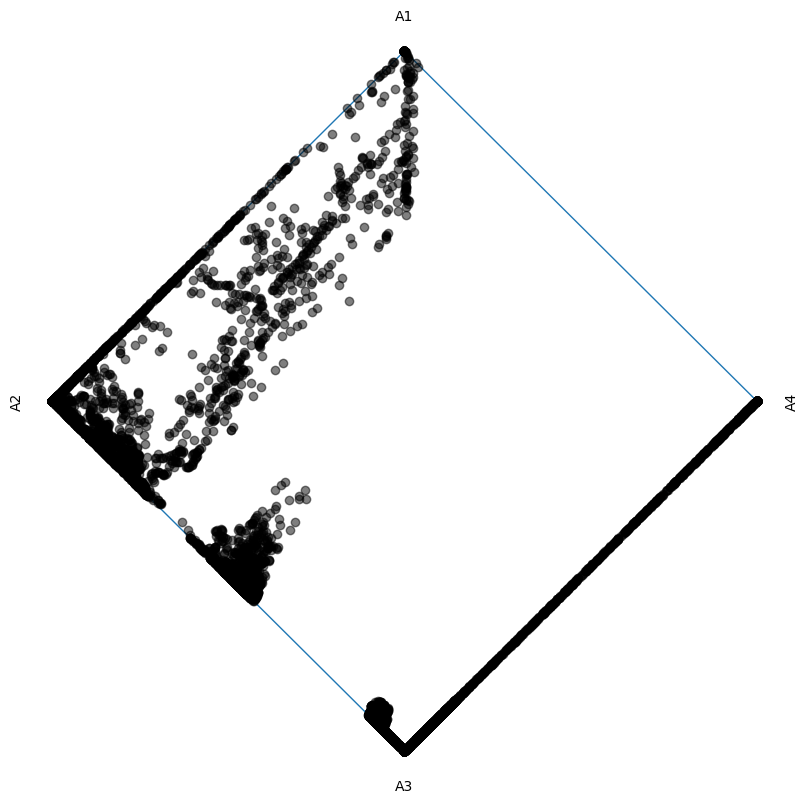

In [43]:
AA.plot_simplex(AA.alfa)

### AA.archetype_profile (291, 4)
### AA.alfa.shape (4, 9533)

In [44]:
X.shape

(9533, 291)

In [45]:
AA.archetypes.shape

(291, 4)

In [46]:
AA.beta

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [47]:
AA.alfa

array([[0.27459266, 0.27207586, 0.06772941, ..., 0.        , 0.        ,
        0.        ],
       [0.49742588, 0.49911475, 0.68125938, ..., 0.        , 0.        ,
        0.        ],
       [0.21396605, 0.2150365 , 0.23498541, ..., 0.9658764 , 0.61692156,
        0.60050586],
       [0.01401539, 0.01377287, 0.01602579, ..., 0.03412362, 0.38307845,
        0.39949415]])

In [48]:
for j in range(AA.beta.shape[1]):
    print(sum([i[j] for i in AA.beta]))

1.0000002441401377
1.0000000491563594
1.000000018869394
1.0000000377272744


In [49]:
AA.beta.shape

(9533, 4)

In [50]:
for j in range(AA.alfa.shape[1]):
    print(sum([i[j] for i in AA.alfa]))

0.9999999845859314
0.9999999848452429
0.9999999873571467
0.9999999885544184
0.9999999827729972
1.0000000762144665
1.000000776495845
1.000000787703033
1.0000000038188648
1.0000000038084462
1.0000000165532927
1.0000047496886055
1.0000000030977776
1.0000032997242014
0.9999999891810529
0.9999999854568931
0.9999999872533568
0.9999999892690882
0.9999999895422295
0.9999999895203451
0.9999999890019167
0.9999999895930415
0.9999999848476878
0.9999999815931565
0.9999999993607305
0.9999999994336067
0.9999999972396177
1.000000000557787
1.0000000005774095
1.000000001040309
0.9999999995001814
0.9999999996206652
0.9999999988862109
1.0000000318158635
1.0000000313995818
1.000000029344523
1.0000000306359769
1.0000000313062196
1.000000031648974
1.0000000324923455
1.0000000343900937
1.0000000294352582
1.0000000293706421
1.000000010699925
1.000000012836173
1.0000000120933241
1.0000000125738011
1.000000010837267
1.0000000126813318
1.0000000136040765
1.0000000121673984
0.9999999854857458
0.9999999865744849
0.

### Conclusion: The alpha condition and beta condition are working, with sum(alpha) closer to 1 and sum(beta) closer to 1

## Comparing the main points of AA4 and AA8

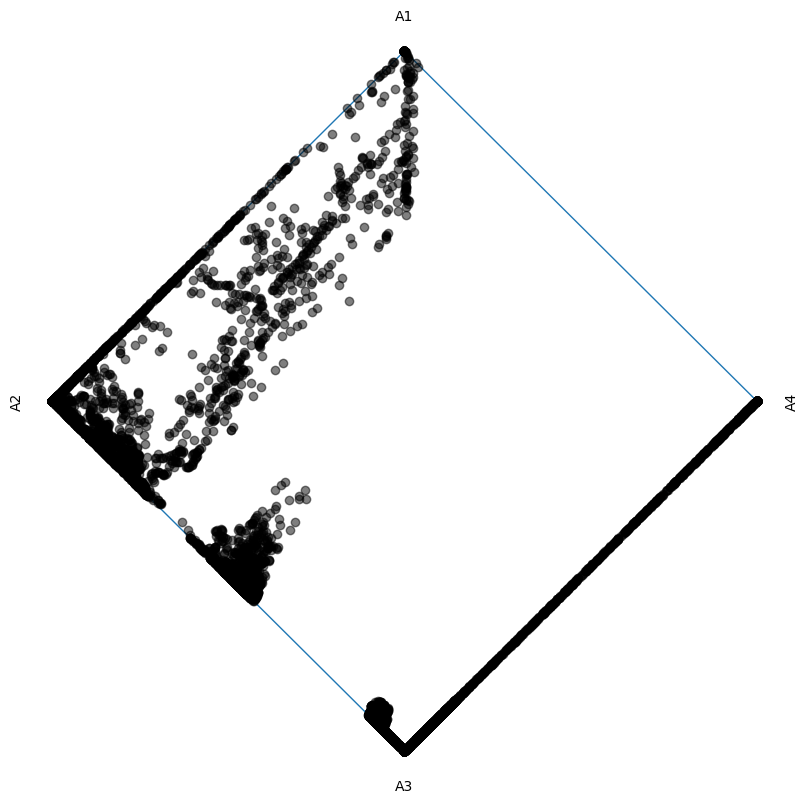

In [51]:
AA4 = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA4.fit(X_scaled)
AA4.plot_simplex(AA4.alfa)

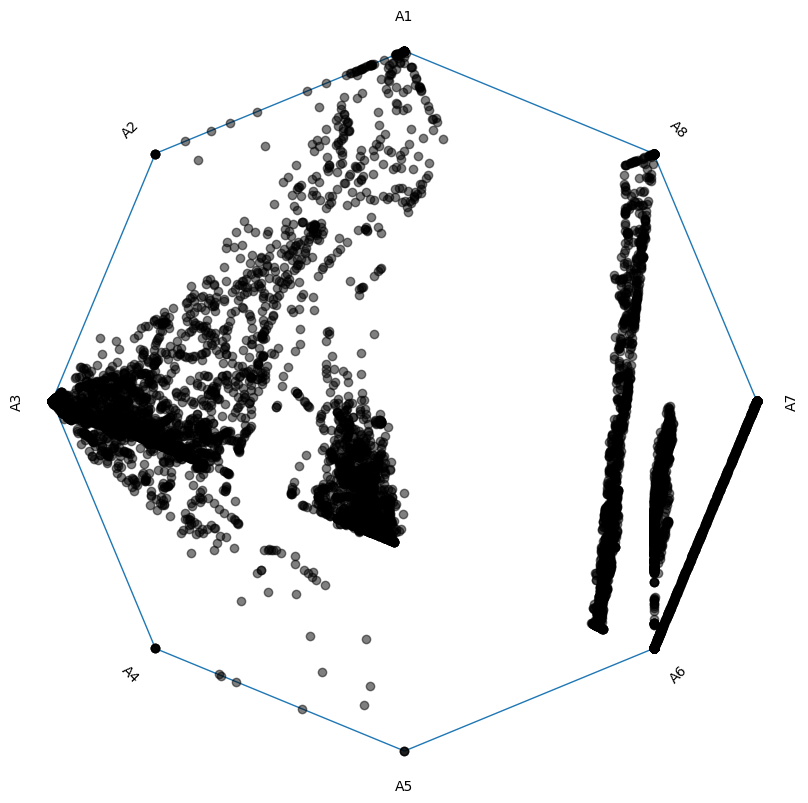

In [52]:
AA8 = ArchetypalAnalysis(n_archetypes = 8, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA8.fit(X_scaled)
AA8.plot_simplex(AA8.alfa)

### A2 in AA4 and A3 in AA8 looks like main points. Let's do cosine similarity between the 4 vs 8 archetypes and see if this is true

In [70]:
AA4.archetypes

array([[-0.11863465,  0.47898883, -0.16668273, -0.16668273],
       [-0.08305261,  0.52516805, -0.19564465, -0.19564456],
       [-0.07375526,  0.55317674, -0.22682912, -0.22680736],
       ...,
       [ 1.20476832,  1.45751502, -0.93869574, -1.06786279],
       [ 1.20476818,  1.4575151 , -0.93869572, -1.06786278],
       [ 1.20475978,  1.45753109, -0.93869662, -1.06786451]])

In [71]:
AA8.archetypes

array([[-0.16245003, -0.14931436,  0.26110167, ..., -0.16668271,
        -0.16668273, -0.16668273],
       [-0.19009291, -0.17399256,  0.29399473, ..., -0.19564462,
        -0.19564462, -0.19564466],
       [-0.21769718, -0.17939633,  0.3204881 , ..., -0.22682897,
        -0.22682206, -0.22682911],
       ...,
       [ 1.20642332,  1.25135182,  1.44185902, ..., -0.9791652 ,
        -1.06909141, -0.76049202],
       [ 1.20642316,  1.2513522 ,  1.44185914, ..., -0.97916518,
        -1.0690914 , -0.76049199],
       [ 1.20634831,  1.25133939,  1.44187211, ..., -0.97916633,
        -1.06909314, -0.76049172]])

In [74]:
AA8.archetypes.T[6]

array([-0.16668273, -0.19564462, -0.22682206, -0.49018323, -0.23464058,
        0.        , -0.28585698, -0.38380987, -0.21630121,  0.        ,
        0.        , -0.33079947,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.26374293, -0.28374389, -0.11367627,  0.        ,  0.        ,
       -0.20898044, -0.3762275 , -0.1568663 , -0.27684105, -0.23902011,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.09824096, -1.05368417, -0.27020441,
       -0.11619691, -1.06794279, -0.5271853 , -1.05293168, -1.04584355,
       -1.07416241, -0.08144903, -1.05590018, -0.5396732 , -0.19451587,
       -1.04886271, -1.05050939, -1.0586087 , -0.43670872, -1.04413858,
       -0.03418489, -1.06004933, -0.12009136, -0.29110982, -0.21810277,
        4.36371651, -1.05228327, -0.55776154, -0.35392696, -0.26749374,
       -0.38791173, -0.37451359, -0.96612157, -0.16842222, -0.92

In [75]:
AA4.archetypes.T[3]

array([-0.16668273, -0.19564456, -0.22680736, -0.48935385, -0.23445466,
        0.        , -0.28438594, -0.38219612, -0.21597781,  0.        ,
        0.        , -0.32671623,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.26093532, -0.28177043, -0.11274236,  0.        ,  0.        ,
       -0.20819559, -0.37606209, -0.15685072, -0.27607114, -0.23866658,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.09824099, -1.05249277, -0.27016205,
       -0.11616277, -1.06664431, -0.52694064, -1.0516392 , -1.04452953,
       -1.07291016, -0.08144901, -1.05462265, -0.53873251, -0.1945352 ,
       -1.0475568 , -1.04920943, -1.05734006, -0.43656768, -1.04282577,
       -0.03418049, -1.05877626, -0.11998608, -0.29090141, -0.21759259,
        4.31943872, -1.05098959, -0.55621233, -0.35319544, -0.26422168,
       -0.38402215, -0.37230805, -0.96510143, -0.16842207, -0.92

In [68]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming arr1 and arr2 are your numpy arrays
arr1 = AA4.archetypes.T
arr2 = AA8.archetypes.T

# Calculate cosine similarity
similarities = cosine_similarity(arr1, arr2)

# Find the indices of the pair with the highest similarity
max_row, max_col = np.unravel_index(np.argmax(similarities), similarities.shape)

print("Index of closest pair (arr1):", max_row)
print("Index of closest pair (arr2):", max_col)

Index of closest pair (arr1): 3
Index of closest pair (arr2): 6


### A4 in AA4 and A7 in AA8

In [78]:
# Flatten the similarity matrix to get sorted indices
sorted_indices = np.argsort(similarities, axis=None)[::-1]

# Get the row and column indices for the sorted similarity values
max_indices = np.unravel_index(sorted_indices, similarities.shape)

# Print indices of pairs with highest similarity, second highest, third highest, and so on
for i in range(min([len(arr1),len(arr2)])):
    print(f"Pair {i+1}: Index of closest pair (arr1): {max_indices[0][i]}, Index of closest pair (arr2): {max_indices[1][i]}")

Pair 1: Index of closest pair (arr1): 3, Index of closest pair (arr2): 6
Pair 2: Index of closest pair (arr1): 1, Index of closest pair (arr2): 2
Pair 3: Index of closest pair (arr1): 0, Index of closest pair (arr2): 0
Pair 4: Index of closest pair (arr1): 2, Index of closest pair (arr2): 5


### A4 in AA4 and A7 in AA8
### A2 in AA4 and A3 in AA8
### A1 in AA4 and A1 in AA8
### A3 in AA4 and A6 in AA8

## AA4 and AA5

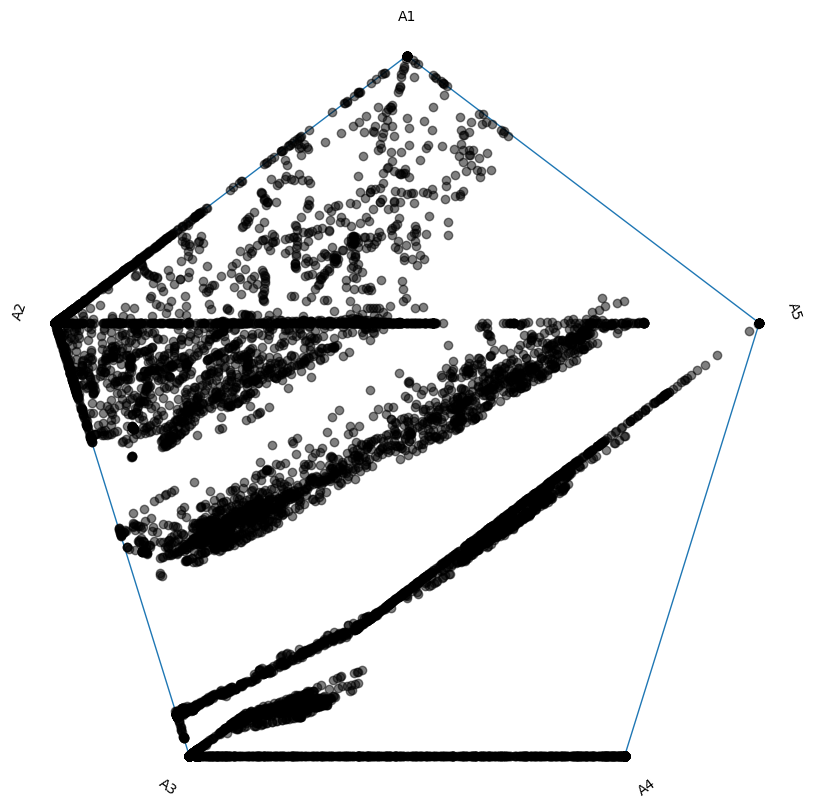

In [79]:
AA5 = ArchetypalAnalysis(n_archetypes = 5, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA5.fit(X_scaled)
AA5.plot_simplex(AA5.alfa)

In [80]:
# Assuming arr1 and arr2 are your numpy arrays
arr1 = AA4.archetypes.T
arr2 = AA5.archetypes.T

# Calculate cosine similarity
similarities = cosine_similarity(arr1, arr2)

# Flatten the similarity matrix to get sorted indices
sorted_indices = np.argsort(similarities, axis=None)[::-1]

# Get the row and column indices for the sorted similarity values
max_indices = np.unravel_index(sorted_indices, similarities.shape)

# Print indices of pairs with highest similarity, second highest, third highest, and so on
for i in range(min([len(arr1),len(arr2)])):
    print(f"Pair {i+1}: Index of closest pair (arr1): {max_indices[0][i]}, Index of closest pair (arr2): {max_indices[1][i]}")

Pair 1: Index of closest pair (arr1): 3, Index of closest pair (arr2): 3
Pair 2: Index of closest pair (arr1): 0, Index of closest pair (arr2): 0
Pair 3: Index of closest pair (arr1): 2, Index of closest pair (arr2): 2
Pair 4: Index of closest pair (arr1): 1, Index of closest pair (arr2): 1


## AA4 and AA6

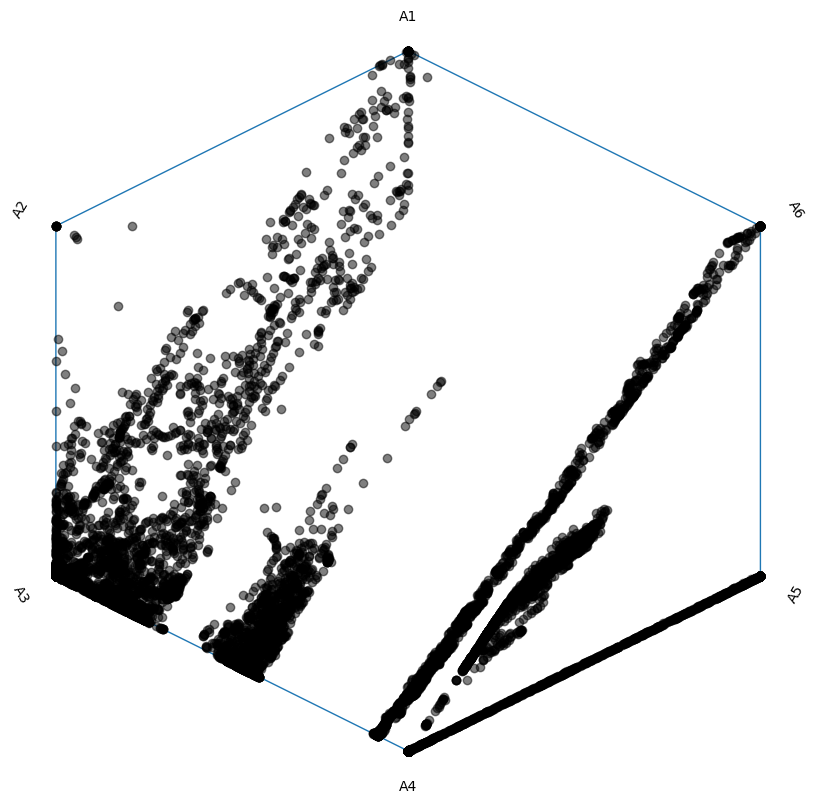

In [81]:
AA6 = ArchetypalAnalysis(n_archetypes = 6, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA6.fit(X_scaled)
AA6.plot_simplex(AA6.alfa)

In [82]:
# Assuming arr1 and arr2 are your numpy arrays
arr1 = AA4.archetypes.T
arr2 = AA6.archetypes.T

# Calculate cosine similarity
similarities = cosine_similarity(arr1, arr2)

# Flatten the similarity matrix to get sorted indices
sorted_indices = np.argsort(similarities, axis=None)[::-1]

# Get the row and column indices for the sorted similarity values
max_indices = np.unravel_index(sorted_indices, similarities.shape)

# Print indices of pairs with highest similarity, second highest, third highest, and so on
for i in range(min([len(arr1),len(arr2)])):
    print(f"Pair {i+1}: Index of closest pair (arr1): {max_indices[0][i]}, Index of closest pair (arr2): {max_indices[1][i]}")

Pair 1: Index of closest pair (arr1): 3, Index of closest pair (arr2): 4
Pair 2: Index of closest pair (arr1): 0, Index of closest pair (arr2): 0
Pair 3: Index of closest pair (arr1): 1, Index of closest pair (arr2): 2
Pair 4: Index of closest pair (arr1): 2, Index of closest pair (arr2): 3


### Shape and Colour - Location, Level

In [88]:
folder_path = 'samples/'

# Create a dictionary with filename as keys and concentrations as objects
data = {}
# List all files in the folder and subdirectories
for root, dirs, files in os.walk(folder_path):
    for file in files:
        print(os.path.join(root, file))
        chemical_case = ChemicalCase(os.path.join(root,file))
        concentrations = chemical_case.concentrations
        data[file] = file.split('_')[:2] + concentrations

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')

# Rename columns as C1, C2, ...C291
df.columns = ['Location','Level']+['C' + str(i + 1) for i in range(len(df.columns)-2)]

# Set the filename as the index
df.index.name = 'filename'

samples/AmazonTwilight_L10_20180101_2215.txt
samples/AmazonTwilight_L10_20180101_2230.txt
samples/AmazonTwilight_L10_20180401_2130.txt
samples/AmazonTwilight_L10_20180402_1015.txt
samples/AmazonTwilight_L10_20180702_0945.txt
samples/AmazonTwilight_L1_20180101_2145.txt
samples/AmazonTwilight_L1_20180102_0930.txt
samples/AmazonTwilight_L1_20180102_1000.txt
samples/AmazonTwilight_L1_20180401_2145.txt
samples/AmazonTwilight_L1_20180401_2200.txt
samples/AmazonTwilight_L1_20180402_0945.txt
samples/AmazonTwilight_L1_20180702_1030.txt
samples/AmazonTwilight_L1_20180930_2230.txt
samples/AmazonTwilight_L1_20181001_0945.txt
samples/AmazonTwilight_L23_20180101_2200.txt
samples/AmazonTwilight_L23_20180102_0930.txt
samples/AmazonTwilight_L23_20180402_1030.txt
samples/AmazonTwilight_L23_20180701_2130.txt
samples/AmazonTwilight_L23_20180701_2215.txt
samples/AmazonTwilight_L23_20180701_2230.txt
samples/AmazonTwilight_L23_20180702_0945.txt
samples/AmazonTwilight_L23_20180702_1030.txt
samples/AmazonTwili

samples/Amazon_L23_20180702_0100.txt
samples/Amazon_L23_20180702_0130.txt
samples/Amazon_L23_20180702_0215.txt
samples/Amazon_L23_20180702_0230.txt
samples/Amazon_L23_20180702_0245.txt
samples/Amazon_L23_20180702_0300.txt
samples/Amazon_L23_20180702_0400.txt
samples/Amazon_L23_20180702_0430.txt
samples/Amazon_L23_20180702_0515.txt
samples/Amazon_L23_20180702_0600.txt
samples/Amazon_L23_20180702_0815.txt
samples/Amazon_L23_20180702_0900.txt
samples/Amazon_L23_20180702_1500.txt
samples/Amazon_L23_20180702_1745.txt
samples/Amazon_L23_20180702_1800.txt
samples/Amazon_L23_20180702_2015.txt
samples/Amazon_L23_20180702_2030.txt
samples/Amazon_L23_20180930_2300.txt
samples/Amazon_L23_20180930_2330.txt
samples/Amazon_L23_20180930_2345.txt
samples/Amazon_L23_20181001_0045.txt
samples/Amazon_L23_20181001_0145.txt
samples/Amazon_L23_20181001_0215.txt
samples/Amazon_L23_20181001_0315.txt
samples/Amazon_L23_20181001_0715.txt
samples/Amazon_L23_20181001_0745.txt
samples/Amazon_L23_20181001_0800.txt
s

samples/Amazon_L56_20180102_2030.txt
samples/Amazon_L56_20180102_2045.txt
samples/Amazon_L56_20180401_2100.txt
samples/Amazon_L56_20180401_2300.txt
samples/Amazon_L56_20180401_2330.txt
samples/Amazon_L56_20180402_0015.txt
samples/Amazon_L56_20180402_0030.txt
samples/Amazon_L56_20180402_0145.txt
samples/Amazon_L56_20180402_0230.txt
samples/Amazon_L56_20180402_0245.txt
samples/Amazon_L56_20180402_0430.txt
samples/Amazon_L56_20180402_0445.txt
samples/Amazon_L56_20180402_0515.txt
samples/Amazon_L56_20180402_0545.txt
samples/Amazon_L56_20180402_0630.txt
samples/Amazon_L56_20180402_0745.txt
samples/Amazon_L56_20180402_1045.txt
samples/Amazon_L56_20180402_1215.txt
samples/Amazon_L56_20180402_1230.txt
samples/Amazon_L56_20180402_1245.txt
samples/Amazon_L56_20180402_1300.txt
samples/Amazon_L56_20180402_1400.txt
samples/Amazon_L56_20180402_1430.txt
samples/Amazon_L56_20180402_1545.txt
samples/Amazon_L56_20180402_1645.txt
samples/Amazon_L56_20180402_1900.txt
samples/Amazon_L56_20180402_1945.txt
s

samples/AtlanticOcean_L10_20181001_1030.txt
samples/AtlanticOcean_L10_20181001_1115.txt
samples/AtlanticOcean_L10_20181001_1245.txt
samples/AtlanticOcean_L10_20181001_1345.txt
samples/AtlanticOcean_L10_20181001_1400.txt
samples/AtlanticOcean_L10_20181001_1500.txt
samples/AtlanticOcean_L10_20181001_1530.txt
samples/AtlanticOcean_L10_20181001_1600.txt
samples/AtlanticOcean_L10_20181001_1615.txt
samples/AtlanticOcean_L10_20181001_1630.txt
samples/AtlanticOcean_L10_20181001_1645.txt
samples/AtlanticOcean_L10_20181001_1800.txt
samples/AtlanticOcean_L1_20180102_0330.txt
samples/AtlanticOcean_L1_20180102_0415.txt
samples/AtlanticOcean_L1_20180102_0515.txt
samples/AtlanticOcean_L1_20180102_0700.txt
samples/AtlanticOcean_L1_20180102_0830.txt
samples/AtlanticOcean_L1_20180102_1300.txt
samples/AtlanticOcean_L1_20180102_1430.txt
samples/AtlanticOcean_L1_20180102_1500.txt
samples/AtlanticOcean_L1_20180102_1545.txt
samples/AtlanticOcean_L1_20180102_1600.txt
samples/AtlanticOcean_L1_20180102_1800.txt

samples/AtlanticOcean_L35_20180701_2315.txt
samples/AtlanticOcean_L35_20180701_2330.txt
samples/AtlanticOcean_L35_20180702_0000.txt
samples/AtlanticOcean_L35_20180702_0315.txt
samples/AtlanticOcean_L35_20180702_0400.txt
samples/AtlanticOcean_L35_20180702_0415.txt
samples/AtlanticOcean_L35_20180702_0430.txt
samples/AtlanticOcean_L35_20180702_0445.txt
samples/AtlanticOcean_L35_20180702_0515.txt
samples/AtlanticOcean_L35_20180702_0615.txt
samples/AtlanticOcean_L35_20180702_0630.txt
samples/AtlanticOcean_L35_20180702_0815.txt
samples/AtlanticOcean_L35_20180702_0915.txt
samples/AtlanticOcean_L35_20180702_1000.txt
samples/AtlanticOcean_L35_20180702_1030.txt
samples/AtlanticOcean_L35_20180702_1200.txt
samples/AtlanticOcean_L35_20180702_1230.txt
samples/AtlanticOcean_L35_20180702_1315.txt
samples/AtlanticOcean_L35_20180702_1445.txt
samples/AtlanticOcean_L35_20180702_1600.txt
samples/AtlanticOcean_L35_20180702_1615.txt
samples/AtlanticOcean_L35_20180702_1645.txt
samples/AtlanticOcean_L35_201807

samples/AtlanticOcean_L56_20181001_0300.txt
samples/AtlanticOcean_L56_20181001_0430.txt
samples/AtlanticOcean_L56_20181001_0545.txt
samples/AtlanticOcean_L56_20181001_0630.txt
samples/AtlanticOcean_L56_20181001_0715.txt
samples/AtlanticOcean_L56_20181001_1000.txt
samples/AtlanticOcean_L56_20181001_1100.txt
samples/AtlanticOcean_L56_20181001_1230.txt
samples/AtlanticOcean_L56_20181001_1245.txt
samples/AtlanticOcean_L56_20181001_1315.txt
samples/AtlanticOcean_L56_20181001_1330.txt
samples/AtlanticOcean_L56_20181001_1545.txt
samples/AtlanticOcean_L56_20181001_1630.txt
samples/AtlanticOcean_L56_20181001_1700.txt
samples/AtlanticOcean_L56_20181001_1800.txt
samples/AtlanticOcean_L56_20181001_1915.txt
samples/AtlanticOcean_L56_20181001_1930.txt
samples/AtlanticOcean_L56_20181001_1945.txt
samples/BeijingTwilight_L10_20180101_2300.txt
samples/BeijingTwilight_L10_20180101_2315.txt
samples/BeijingTwilight_L10_20180101_2330.txt
samples/BeijingTwilight_L10_20180102_0915.txt
samples/BeijingTwilight_

samples/Beijing_L1_20180402_1815.txt
samples/Beijing_L1_20180402_1930.txt
samples/Beijing_L1_20180402_2030.txt
samples/Beijing_L1_20180701_2145.txt
samples/Beijing_L1_20180702_0000.txt
samples/Beijing_L1_20180702_0015.txt
samples/Beijing_L1_20180702_0115.txt
samples/Beijing_L1_20180702_0145.txt
samples/Beijing_L1_20180702_0330.txt
samples/Beijing_L1_20180702_0430.txt
samples/Beijing_L1_20180702_0615.txt
samples/Beijing_L1_20180702_0630.txt
samples/Beijing_L1_20180702_0645.txt
samples/Beijing_L1_20180702_0715.txt
samples/Beijing_L1_20180702_0845.txt
samples/Beijing_L1_20180702_1000.txt
samples/Beijing_L1_20180702_1315.txt
samples/Beijing_L1_20180702_1415.txt
samples/Beijing_L1_20180702_1430.txt
samples/Beijing_L1_20180702_1545.txt
samples/Beijing_L1_20180702_1930.txt
samples/Beijing_L1_20180930_2300.txt
samples/Beijing_L1_20180930_2315.txt
samples/Beijing_L1_20181001_0015.txt
samples/Beijing_L1_20181001_0100.txt
samples/Beijing_L1_20181001_0215.txt
samples/Beijing_L1_20181001_0245.txt
s

samples/Beijing_L35_20181001_1100.txt
samples/Beijing_L35_20181001_1145.txt
samples/Beijing_L35_20181001_1300.txt
samples/Beijing_L35_20181001_1345.txt
samples/Beijing_L35_20181001_1530.txt
samples/Beijing_L35_20181001_1645.txt
samples/Beijing_L35_20181001_1715.txt
samples/Beijing_L35_20181001_1745.txt
samples/Beijing_L35_20181001_1800.txt
samples/Beijing_L35_20181001_1815.txt
samples/Beijing_L35_20181001_1930.txt
samples/Beijing_L35_20181001_2045.txt
samples/Beijing_L48_20180101_2100.txt
samples/Beijing_L48_20180101_2130.txt
samples/Beijing_L48_20180102_0130.txt
samples/Beijing_L48_20180102_0215.txt
samples/Beijing_L48_20180102_0245.txt
samples/Beijing_L48_20180102_0415.txt
samples/Beijing_L48_20180102_0430.txt
samples/Beijing_L48_20180102_0500.txt
samples/Beijing_L48_20180102_0630.txt
samples/Beijing_L48_20180102_0945.txt
samples/Beijing_L48_20180102_1115.txt
samples/Beijing_L48_20180102_1145.txt
samples/Beijing_L48_20180102_1215.txt
samples/Beijing_L48_20180102_1415.txt
samples/Beij

samples/BorneoTwilight_L56_20180702_1000.txt
samples/BorneoTwilight_L56_20180702_1045.txt
samples/BorneoTwilight_L56_20180930_2230.txt
samples/BorneoTwilight_L56_20181001_1045.txt
samples/Borneo_L10_20180101_2330.txt
samples/Borneo_L10_20180101_2345.txt
samples/Borneo_L10_20180102_0015.txt
samples/Borneo_L10_20180102_0045.txt
samples/Borneo_L10_20180102_0115.txt
samples/Borneo_L10_20180102_0130.txt
samples/Borneo_L10_20180102_0300.txt
samples/Borneo_L10_20180102_0330.txt
samples/Borneo_L10_20180102_0345.txt
samples/Borneo_L10_20180102_0400.txt
samples/Borneo_L10_20180102_0500.txt
samples/Borneo_L10_20180102_0545.txt
samples/Borneo_L10_20180102_0700.txt
samples/Borneo_L10_20180102_0730.txt
samples/Borneo_L10_20180102_0915.txt
samples/Borneo_L10_20180102_1200.txt
samples/Borneo_L10_20180102_1315.txt
samples/Borneo_L10_20180102_1330.txt
samples/Borneo_L10_20180102_1400.txt
samples/Borneo_L10_20180102_1415.txt
samples/Borneo_L10_20180102_1500.txt
samples/Borneo_L10_20180102_1515.txt
sample

samples/Borneo_L23_20180402_1345.txt
samples/Borneo_L23_20180402_1445.txt
samples/Borneo_L23_20180402_1530.txt
samples/Borneo_L23_20180402_1600.txt
samples/Borneo_L23_20180402_1630.txt
samples/Borneo_L23_20180402_1645.txt
samples/Borneo_L23_20180402_1730.txt
samples/Borneo_L23_20180402_1745.txt
samples/Borneo_L23_20180402_2045.txt
samples/Borneo_L23_20180701_2100.txt
samples/Borneo_L23_20180701_2145.txt
samples/Borneo_L23_20180702_0045.txt
samples/Borneo_L23_20180702_0145.txt
samples/Borneo_L23_20180702_0230.txt
samples/Borneo_L23_20180702_0300.txt
samples/Borneo_L23_20180702_0400.txt
samples/Borneo_L23_20180702_0415.txt
samples/Borneo_L23_20180702_0545.txt
samples/Borneo_L23_20180702_0615.txt
samples/Borneo_L23_20180702_0630.txt
samples/Borneo_L23_20180702_0730.txt
samples/Borneo_L23_20180702_0745.txt
samples/Borneo_L23_20180702_0800.txt
samples/Borneo_L23_20180702_0845.txt
samples/Borneo_L23_20180702_0900.txt
samples/Borneo_L23_20180702_0930.txt
samples/Borneo_L23_20180702_1115.txt
s

samples/Borneo_L56_20180402_0330.txt
samples/Borneo_L56_20180402_0445.txt
samples/Borneo_L56_20180402_0500.txt
samples/Borneo_L56_20180402_0700.txt
samples/Borneo_L56_20180402_0715.txt
samples/Borneo_L56_20180402_0915.txt
samples/Borneo_L56_20180402_1100.txt
samples/Borneo_L56_20180402_1115.txt
samples/Borneo_L56_20180402_1500.txt
samples/Borneo_L56_20180402_1515.txt
samples/Borneo_L56_20180402_1530.txt
samples/Borneo_L56_20180402_1700.txt
samples/Borneo_L56_20180402_1930.txt
samples/Borneo_L56_20180701_2115.txt
samples/Borneo_L56_20180702_0100.txt
samples/Borneo_L56_20180702_0130.txt
samples/Borneo_L56_20180702_0415.txt
samples/Borneo_L56_20180702_0500.txt
samples/Borneo_L56_20180702_0645.txt
samples/Borneo_L56_20180702_0730.txt
samples/Borneo_L56_20180702_0800.txt
samples/Borneo_L56_20180702_0830.txt
samples/Borneo_L56_20180702_0915.txt
samples/Borneo_L56_20180702_0930.txt
samples/Borneo_L56_20180702_1100.txt
samples/Borneo_L56_20180702_1200.txt
samples/Borneo_L56_20180702_1215.txt
s

samples/CapeGrim_L10_20181001_1530.txt
samples/CapeGrim_L10_20181001_1600.txt
samples/CapeGrim_L10_20181001_1730.txt
samples/CapeGrim_L1_20180101_2100.txt
samples/CapeGrim_L1_20180101_2130.txt
samples/CapeGrim_L1_20180101_2230.txt
samples/CapeGrim_L1_20180101_2300.txt
samples/CapeGrim_L1_20180101_2315.txt
samples/CapeGrim_L1_20180101_2345.txt
samples/CapeGrim_L1_20180102_0030.txt
samples/CapeGrim_L1_20180102_0100.txt
samples/CapeGrim_L1_20180102_0230.txt
samples/CapeGrim_L1_20180102_0330.txt
samples/CapeGrim_L1_20180102_0400.txt
samples/CapeGrim_L1_20180102_0600.txt
samples/CapeGrim_L1_20180102_0615.txt
samples/CapeGrim_L1_20180102_1100.txt
samples/CapeGrim_L1_20180102_1130.txt
samples/CapeGrim_L1_20180102_1300.txt
samples/CapeGrim_L1_20180102_1315.txt
samples/CapeGrim_L1_20180102_1430.txt
samples/CapeGrim_L1_20180102_1445.txt
samples/CapeGrim_L1_20180102_1715.txt
samples/CapeGrim_L1_20180102_1730.txt
samples/CapeGrim_L1_20180102_1945.txt
samples/CapeGrim_L1_20180401_2115.txt
samples/C

samples/CapeGrim_L35_20181001_0615.txt
samples/CapeGrim_L35_20181001_0630.txt
samples/CapeGrim_L35_20181001_0715.txt
samples/CapeGrim_L35_20181001_1030.txt
samples/CapeGrim_L35_20181001_1045.txt
samples/CapeGrim_L35_20181001_1215.txt
samples/CapeGrim_L35_20181001_1245.txt
samples/CapeGrim_L35_20181001_1500.txt
samples/CapeGrim_L35_20181001_1515.txt
samples/CapeGrim_L35_20181001_1630.txt
samples/CapeGrim_L35_20181001_1730.txt
samples/CapeGrim_L35_20181001_1815.txt
samples/CapeGrim_L48_20180101_2100.txt
samples/CapeGrim_L48_20180101_2130.txt
samples/CapeGrim_L48_20180102_0015.txt
samples/CapeGrim_L48_20180102_0115.txt
samples/CapeGrim_L48_20180102_0200.txt
samples/CapeGrim_L48_20180102_0245.txt
samples/CapeGrim_L48_20180102_0300.txt
samples/CapeGrim_L48_20180102_0415.txt
samples/CapeGrim_L48_20180102_0445.txt
samples/CapeGrim_L48_20180102_0515.txt
samples/CapeGrim_L48_20180102_0745.txt
samples/CapeGrim_L48_20180102_0830.txt
samples/CapeGrim_L48_20180102_1115.txt
samples/CapeGrim_L48_2018

samples/CongoTwilight_L35_20181001_1700.txt
samples/CongoTwilight_L48_20180102_0415.txt
samples/CongoTwilight_L48_20180402_0430.txt
samples/CongoTwilight_L48_20180402_1645.txt
samples/CongoTwilight_L48_20180702_1615.txt
samples/CongoTwilight_L48_20180702_1645.txt
samples/CongoTwilight_L48_20181001_1715.txt
samples/CongoTwilight_L56_20180102_0415.txt
samples/CongoTwilight_L56_20180102_0445.txt
samples/CongoTwilight_L56_20180402_0430.txt
samples/CongoTwilight_L56_20180402_0500.txt
samples/CongoTwilight_L56_20180702_0500.txt
samples/CongoTwilight_L56_20180702_1645.txt
samples/CongoTwilight_L56_20180702_1700.txt
samples/CongoTwilight_L56_20181001_1615.txt
samples/CongoTwilight_L56_20181001_1645.txt
samples/CongoTwilight_L56_20181001_1715.txt
samples/Congo_L10_20180101_2215.txt
samples/Congo_L10_20180101_2230.txt
samples/Congo_L10_20180101_2245.txt
samples/Congo_L10_20180102_0115.txt
samples/Congo_L10_20180102_0130.txt
samples/Congo_L10_20180102_0315.txt
samples/Congo_L10_20180102_0330.txt


samples/Congo_L23_20180701_2145.txt
samples/Congo_L23_20180702_0015.txt
samples/Congo_L23_20180702_0200.txt
samples/Congo_L23_20180702_0315.txt
samples/Congo_L23_20180702_0400.txt
samples/Congo_L23_20180702_0515.txt
samples/Congo_L23_20180702_0745.txt
samples/Congo_L23_20180702_0845.txt
samples/Congo_L23_20180702_1015.txt
samples/Congo_L23_20180702_1100.txt
samples/Congo_L23_20180702_1115.txt
samples/Congo_L23_20180702_1130.txt
samples/Congo_L23_20180702_1215.txt
samples/Congo_L23_20180702_1445.txt
samples/Congo_L23_20180702_1730.txt
samples/Congo_L23_20180702_1900.txt
samples/Congo_L23_20180702_1915.txt
samples/Congo_L23_20180702_2000.txt
samples/Congo_L23_20180702_2045.txt
samples/Congo_L23_20180930_2130.txt
samples/Congo_L23_20181001_0100.txt
samples/Congo_L23_20181001_0145.txt
samples/Congo_L23_20181001_0545.txt
samples/Congo_L23_20181001_0645.txt
samples/Congo_L23_20181001_0730.txt
samples/Congo_L23_20181001_0830.txt
samples/Congo_L23_20181001_1000.txt
samples/Congo_L23_20181001_1

samples/Congo_L56_20180102_1200.txt
samples/Congo_L56_20180102_1515.txt
samples/Congo_L56_20180102_1600.txt
samples/Congo_L56_20180102_1745.txt
samples/Congo_L56_20180102_1830.txt
samples/Congo_L56_20180102_1900.txt
samples/Congo_L56_20180102_1945.txt
samples/Congo_L56_20180102_2045.txt
samples/Congo_L56_20180401_2145.txt
samples/Congo_L56_20180401_2200.txt
samples/Congo_L56_20180401_2215.txt
samples/Congo_L56_20180401_2345.txt
samples/Congo_L56_20180402_0030.txt
samples/Congo_L56_20180402_0130.txt
samples/Congo_L56_20180402_0215.txt
samples/Congo_L56_20180402_0230.txt
samples/Congo_L56_20180402_0245.txt
samples/Congo_L56_20180402_0315.txt
samples/Congo_L56_20180402_0330.txt
samples/Congo_L56_20180402_0345.txt
samples/Congo_L56_20180402_0530.txt
samples/Congo_L56_20180402_0615.txt
samples/Congo_L56_20180402_0800.txt
samples/Congo_L56_20180402_0900.txt
samples/Congo_L56_20180402_0945.txt
samples/Congo_L56_20180402_1045.txt
samples/Congo_L56_20180402_1115.txt
samples/Congo_L56_20180402_1

samples/ElDjouf_L1_20180102_1630.txt
samples/ElDjouf_L1_20180102_1945.txt
samples/ElDjouf_L1_20180102_2000.txt
samples/ElDjouf_L1_20180102_2030.txt
samples/ElDjouf_L1_20180102_2045.txt
samples/ElDjouf_L1_20180401_2145.txt
samples/ElDjouf_L1_20180401_2230.txt
samples/ElDjouf_L1_20180401_2245.txt
samples/ElDjouf_L1_20180401_2345.txt
samples/ElDjouf_L1_20180402_0015.txt
samples/ElDjouf_L1_20180402_0030.txt
samples/ElDjouf_L1_20180402_0200.txt
samples/ElDjouf_L1_20180402_0330.txt
samples/ElDjouf_L1_20180402_0500.txt
samples/ElDjouf_L1_20180402_0700.txt
samples/ElDjouf_L1_20180402_0900.txt
samples/ElDjouf_L1_20180402_0915.txt
samples/ElDjouf_L1_20180402_1145.txt
samples/ElDjouf_L1_20180402_1200.txt
samples/ElDjouf_L1_20180402_1215.txt
samples/ElDjouf_L1_20180402_1230.txt
samples/ElDjouf_L1_20180402_1315.txt
samples/ElDjouf_L1_20180402_1400.txt
samples/ElDjouf_L1_20180402_1615.txt
samples/ElDjouf_L1_20180402_1630.txt
samples/ElDjouf_L1_20180402_1730.txt
samples/ElDjouf_L1_20180701_2100.txt
s

samples/ElDjouf_L35_20180701_2230.txt
samples/ElDjouf_L35_20180701_2245.txt
samples/ElDjouf_L35_20180701_2315.txt
samples/ElDjouf_L35_20180702_0130.txt
samples/ElDjouf_L35_20180702_0230.txt
samples/ElDjouf_L35_20180702_0315.txt
samples/ElDjouf_L35_20180702_0415.txt
samples/ElDjouf_L35_20180702_0445.txt
samples/ElDjouf_L35_20180702_0845.txt
samples/ElDjouf_L35_20180702_0915.txt
samples/ElDjouf_L35_20180702_0930.txt
samples/ElDjouf_L35_20180702_1045.txt
samples/ElDjouf_L35_20180702_1215.txt
samples/ElDjouf_L35_20180702_1345.txt
samples/ElDjouf_L35_20180702_1530.txt
samples/ElDjouf_L35_20180702_1600.txt
samples/ElDjouf_L35_20180702_1630.txt
samples/ElDjouf_L35_20180702_1730.txt
samples/ElDjouf_L35_20180702_1815.txt
samples/ElDjouf_L35_20180702_2000.txt
samples/ElDjouf_L35_20180702_2045.txt
samples/ElDjouf_L35_20180930_2115.txt
samples/ElDjouf_L35_20180930_2230.txt
samples/ElDjouf_L35_20180930_2245.txt
samples/ElDjouf_L35_20181001_0015.txt
samples/ElDjouf_L35_20181001_0045.txt
samples/ElDj

samples/GraciosaTwilight_L23_20180102_1800.txt
samples/GraciosaTwilight_L23_20180102_1830.txt
samples/GraciosaTwilight_L23_20180102_1900.txt
samples/GraciosaTwilight_L23_20180402_0715.txt
samples/GraciosaTwilight_L23_20180402_0800.txt
samples/GraciosaTwilight_L23_20180402_2000.txt
samples/GraciosaTwilight_L23_20180702_0600.txt
samples/GraciosaTwilight_L23_20180702_0700.txt
samples/GraciosaTwilight_L23_20181001_0745.txt
samples/GraciosaTwilight_L23_20181001_1915.txt
samples/GraciosaTwilight_L23_20181001_1930.txt
samples/GraciosaTwilight_L23_20181001_2000.txt
samples/GraciosaTwilight_L23_20181001_2015.txt
samples/GraciosaTwilight_L35_20180402_0730.txt
samples/GraciosaTwilight_L35_20180402_1930.txt
samples/GraciosaTwilight_L35_20180402_2015.txt
samples/GraciosaTwilight_L35_20180701_2100.txt
samples/GraciosaTwilight_L35_20180702_0645.txt
samples/GraciosaTwilight_L35_20180702_2030.txt
samples/GraciosaTwilight_L35_20181001_0745.txt
samples/GraciosaTwilight_L35_20181001_1945.txt
samples/Graci

samples/Graciosa_L23_20180102_0245.txt
samples/Graciosa_L23_20180102_0315.txt
samples/Graciosa_L23_20180102_0345.txt
samples/Graciosa_L23_20180102_0400.txt
samples/Graciosa_L23_20180102_0415.txt
samples/Graciosa_L23_20180102_0730.txt
samples/Graciosa_L23_20180102_1015.txt
samples/Graciosa_L23_20180102_1200.txt
samples/Graciosa_L23_20180102_1300.txt
samples/Graciosa_L23_20180102_1345.txt
samples/Graciosa_L23_20180102_1615.txt
samples/Graciosa_L23_20180102_1715.txt
samples/Graciosa_L23_20180102_2000.txt
samples/Graciosa_L23_20180102_2045.txt
samples/Graciosa_L23_20180401_2245.txt
samples/Graciosa_L23_20180401_2315.txt
samples/Graciosa_L23_20180402_0130.txt
samples/Graciosa_L23_20180402_0145.txt
samples/Graciosa_L23_20180402_0200.txt
samples/Graciosa_L23_20180402_0230.txt
samples/Graciosa_L23_20180402_0245.txt
samples/Graciosa_L23_20180402_0315.txt
samples/Graciosa_L23_20180402_0345.txt
samples/Graciosa_L23_20180402_0415.txt
samples/Graciosa_L23_20180402_0545.txt
samples/Graciosa_L23_2018

samples/Graciosa_L48_20181001_0915.txt
samples/Graciosa_L48_20181001_1000.txt
samples/Graciosa_L48_20181001_1115.txt
samples/Graciosa_L48_20181001_1130.txt
samples/Graciosa_L48_20181001_1330.txt
samples/Graciosa_L48_20181001_1530.txt
samples/Graciosa_L48_20181001_1615.txt
samples/Graciosa_L48_20181001_1730.txt
samples/Graciosa_L48_20181001_2030.txt
samples/Graciosa_L56_20180101_2100.txt
samples/Graciosa_L56_20180101_2230.txt
samples/Graciosa_L56_20180102_0000.txt
samples/Graciosa_L56_20180102_0245.txt
samples/Graciosa_L56_20180102_0300.txt
samples/Graciosa_L56_20180102_0345.txt
samples/Graciosa_L56_20180102_0415.txt
samples/Graciosa_L56_20180102_0430.txt
samples/Graciosa_L56_20180102_0645.txt
samples/Graciosa_L56_20180102_0815.txt
samples/Graciosa_L56_20180102_1100.txt
samples/Graciosa_L56_20180102_1130.txt
samples/Graciosa_L56_20180102_1345.txt
samples/Graciosa_L56_20180102_1545.txt
samples/Graciosa_L56_20180102_1630.txt
samples/Graciosa_L56_20180102_1715.txt
samples/Graciosa_L56_2018

samples/IndianOcean_L10_20180402_1845.txt
samples/IndianOcean_L10_20180402_1945.txt
samples/IndianOcean_L10_20180701_2100.txt
samples/IndianOcean_L10_20180701_2145.txt
samples/IndianOcean_L10_20180701_2215.txt
samples/IndianOcean_L10_20180701_2315.txt
samples/IndianOcean_L10_20180701_2345.txt
samples/IndianOcean_L10_20180702_0215.txt
samples/IndianOcean_L10_20180702_0315.txt
samples/IndianOcean_L10_20180702_0330.txt
samples/IndianOcean_L10_20180702_0345.txt
samples/IndianOcean_L10_20180702_0430.txt
samples/IndianOcean_L10_20180702_0730.txt
samples/IndianOcean_L10_20180702_0745.txt
samples/IndianOcean_L10_20180702_0815.txt
samples/IndianOcean_L10_20180702_1330.txt
samples/IndianOcean_L10_20180702_1445.txt
samples/IndianOcean_L10_20180702_1530.txt
samples/IndianOcean_L10_20180702_1700.txt
samples/IndianOcean_L10_20180702_1730.txt
samples/IndianOcean_L10_20180702_1800.txt
samples/IndianOcean_L10_20180702_1815.txt
samples/IndianOcean_L10_20180702_1915.txt
samples/IndianOcean_L10_20180930_2

samples/IndianOcean_L23_20180702_1330.txt
samples/IndianOcean_L23_20180702_1415.txt
samples/IndianOcean_L23_20180702_1430.txt
samples/IndianOcean_L23_20180702_1500.txt
samples/IndianOcean_L23_20180702_1545.txt
samples/IndianOcean_L23_20180702_1730.txt
samples/IndianOcean_L23_20180702_2015.txt
samples/IndianOcean_L23_20180930_2100.txt
samples/IndianOcean_L23_20180930_2115.txt
samples/IndianOcean_L23_20181001_0045.txt
samples/IndianOcean_L23_20181001_0300.txt
samples/IndianOcean_L23_20181001_0345.txt
samples/IndianOcean_L23_20181001_0415.txt
samples/IndianOcean_L23_20181001_0430.txt
samples/IndianOcean_L23_20181001_0730.txt
samples/IndianOcean_L23_20181001_0815.txt
samples/IndianOcean_L23_20181001_0830.txt
samples/IndianOcean_L23_20181001_0900.txt
samples/IndianOcean_L23_20181001_1245.txt
samples/IndianOcean_L23_20181001_1400.txt
samples/IndianOcean_L23_20181001_1515.txt
samples/IndianOcean_L23_20181001_1615.txt
samples/IndianOcean_L23_20181001_1830.txt
samples/IndianOcean_L23_20181001_1

samples/IndianOcean_L56_20180102_0445.txt
samples/IndianOcean_L56_20180102_0515.txt
samples/IndianOcean_L56_20180102_0545.txt
samples/IndianOcean_L56_20180102_0930.txt
samples/IndianOcean_L56_20180102_0945.txt
samples/IndianOcean_L56_20180102_1015.txt
samples/IndianOcean_L56_20180102_1045.txt
samples/IndianOcean_L56_20180102_1100.txt
samples/IndianOcean_L56_20180102_1115.txt
samples/IndianOcean_L56_20180102_1200.txt
samples/IndianOcean_L56_20180102_1400.txt
samples/IndianOcean_L56_20180102_1415.txt
samples/IndianOcean_L56_20180102_1445.txt
samples/IndianOcean_L56_20180102_1630.txt
samples/IndianOcean_L56_20180102_1800.txt
samples/IndianOcean_L56_20180401_2100.txt
samples/IndianOcean_L56_20180401_2200.txt
samples/IndianOcean_L56_20180402_0100.txt
samples/IndianOcean_L56_20180402_0115.txt
samples/IndianOcean_L56_20180402_0500.txt
samples/IndianOcean_L56_20180402_0545.txt
samples/IndianOcean_L56_20180402_0645.txt
samples/IndianOcean_L56_20180402_0815.txt
samples/IndianOcean_L56_20180402_0

samples/Kinshasa_L1_20180102_0945.txt
samples/Kinshasa_L1_20180102_1545.txt
samples/Kinshasa_L1_20180102_1600.txt
samples/Kinshasa_L1_20180102_1800.txt
samples/Kinshasa_L1_20180102_1815.txt
samples/Kinshasa_L1_20180102_1830.txt
samples/Kinshasa_L1_20180102_1915.txt
samples/Kinshasa_L1_20180102_1930.txt
samples/Kinshasa_L1_20180102_2030.txt
samples/Kinshasa_L1_20180102_2045.txt
samples/Kinshasa_L1_20180401_2130.txt
samples/Kinshasa_L1_20180401_2245.txt
samples/Kinshasa_L1_20180402_0200.txt
samples/Kinshasa_L1_20180402_0245.txt
samples/Kinshasa_L1_20180402_0800.txt
samples/Kinshasa_L1_20180402_0930.txt
samples/Kinshasa_L1_20180402_1045.txt
samples/Kinshasa_L1_20180402_1130.txt
samples/Kinshasa_L1_20180402_1215.txt
samples/Kinshasa_L1_20180402_1230.txt
samples/Kinshasa_L1_20180402_1345.txt
samples/Kinshasa_L1_20180402_1400.txt
samples/Kinshasa_L1_20180402_1430.txt
samples/Kinshasa_L1_20180402_1515.txt
samples/Kinshasa_L1_20180402_1545.txt
samples/Kinshasa_L1_20180402_1745.txt
samples/Kins

samples/Kinshasa_L35_20180702_0800.txt
samples/Kinshasa_L35_20180702_0945.txt
samples/Kinshasa_L35_20180702_1045.txt
samples/Kinshasa_L35_20180702_1215.txt
samples/Kinshasa_L35_20180702_1345.txt
samples/Kinshasa_L35_20180702_1400.txt
samples/Kinshasa_L35_20180702_1815.txt
samples/Kinshasa_L35_20180702_1845.txt
samples/Kinshasa_L35_20180702_1915.txt
samples/Kinshasa_L35_20180702_1945.txt
samples/Kinshasa_L35_20180702_2000.txt
samples/Kinshasa_L35_20180930_2145.txt
samples/Kinshasa_L35_20180930_2300.txt
samples/Kinshasa_L35_20180930_2315.txt
samples/Kinshasa_L35_20181001_0000.txt
samples/Kinshasa_L35_20181001_0045.txt
samples/Kinshasa_L35_20181001_0100.txt
samples/Kinshasa_L35_20181001_0115.txt
samples/Kinshasa_L35_20181001_0245.txt
samples/Kinshasa_L35_20181001_0615.txt
samples/Kinshasa_L35_20181001_0700.txt
samples/Kinshasa_L35_20181001_0730.txt
samples/Kinshasa_L35_20181001_0815.txt
samples/Kinshasa_L35_20181001_1015.txt
samples/Kinshasa_L35_20181001_1100.txt
samples/Kinshasa_L35_2018

samples/LosAngelesTwilight_L10_20180102_0015.txt
samples/LosAngelesTwilight_L10_20180102_0115.txt
samples/LosAngelesTwilight_L10_20180102_1515.txt
samples/LosAngelesTwilight_L10_20180402_0130.txt
samples/LosAngelesTwilight_L10_20180402_0145.txt
samples/LosAngelesTwilight_L10_20180402_0215.txt
samples/LosAngelesTwilight_L10_20180702_0215.txt
samples/LosAngelesTwilight_L10_20180702_0300.txt
samples/LosAngelesTwilight_L10_20180702_0315.txt
samples/LosAngelesTwilight_L10_20180702_1200.txt
samples/LosAngelesTwilight_L10_20180702_1315.txt
samples/LosAngelesTwilight_L10_20181001_0115.txt
samples/LosAngelesTwilight_L10_20181001_0130.txt
samples/LosAngelesTwilight_L10_20181001_1430.txt
samples/LosAngelesTwilight_L1_20180102_0045.txt
samples/LosAngelesTwilight_L1_20180102_0100.txt
samples/LosAngelesTwilight_L1_20180102_1445.txt
samples/LosAngelesTwilight_L1_20180102_1500.txt
samples/LosAngelesTwilight_L1_20180402_0200.txt
samples/LosAngelesTwilight_L1_20180402_1300.txt
samples/LosAngelesTwilight

samples/LosAngeles_L1_20180702_2015.txt
samples/LosAngeles_L1_20180930_2215.txt
samples/LosAngeles_L1_20180930_2300.txt
samples/LosAngeles_L1_20180930_2315.txt
samples/LosAngeles_L1_20181001_0015.txt
samples/LosAngeles_L1_20181001_0030.txt
samples/LosAngeles_L1_20181001_0300.txt
samples/LosAngeles_L1_20181001_0500.txt
samples/LosAngeles_L1_20181001_0530.txt
samples/LosAngeles_L1_20181001_0545.txt
samples/LosAngeles_L1_20181001_0600.txt
samples/LosAngeles_L1_20181001_0615.txt
samples/LosAngeles_L1_20181001_0745.txt
samples/LosAngeles_L1_20181001_0900.txt
samples/LosAngeles_L1_20181001_1045.txt
samples/LosAngeles_L1_20181001_1100.txt
samples/LosAngeles_L1_20181001_1145.txt
samples/LosAngeles_L1_20181001_1200.txt
samples/LosAngeles_L1_20181001_1215.txt
samples/LosAngeles_L1_20181001_1300.txt
samples/LosAngeles_L1_20181001_1545.txt
samples/LosAngeles_L1_20181001_1630.txt
samples/LosAngeles_L1_20181001_1645.txt
samples/LosAngeles_L1_20181001_1715.txt
samples/LosAngeles_L1_20181001_1830.txt


samples/LosAngeles_L48_20180101_2145.txt
samples/LosAngeles_L48_20180101_2215.txt
samples/LosAngeles_L48_20180102_0130.txt
samples/LosAngeles_L48_20180102_0230.txt
samples/LosAngeles_L48_20180102_0315.txt
samples/LosAngeles_L48_20180102_0415.txt
samples/LosAngeles_L48_20180102_0445.txt
samples/LosAngeles_L48_20180102_0600.txt
samples/LosAngeles_L48_20180102_0615.txt
samples/LosAngeles_L48_20180102_0630.txt
samples/LosAngeles_L48_20180102_0845.txt
samples/LosAngeles_L48_20180102_0945.txt
samples/LosAngeles_L48_20180102_1030.txt
samples/LosAngeles_L48_20180102_1045.txt
samples/LosAngeles_L48_20180102_1115.txt
samples/LosAngeles_L48_20180102_1345.txt
samples/LosAngeles_L48_20180102_1700.txt
samples/LosAngeles_L48_20180401_2215.txt
samples/LosAngeles_L48_20180401_2230.txt
samples/LosAngeles_L48_20180401_2345.txt
samples/LosAngeles_L48_20180402_0030.txt
samples/LosAngeles_L48_20180402_0045.txt
samples/LosAngeles_L48_20180402_0100.txt
samples/LosAngeles_L48_20180402_0345.txt
samples/LosAngel

samples/McMurdoTwilight_L1_20180402_1800.txt
samples/McMurdoTwilight_L1_20180402_1830.txt
samples/McMurdoTwilight_L1_20180402_1900.txt
samples/McMurdoTwilight_L1_20180402_1930.txt
samples/McMurdoTwilight_L1_20181001_0600.txt
samples/McMurdoTwilight_L1_20181001_0715.txt
samples/McMurdoTwilight_L1_20181001_0830.txt
samples/McMurdoTwilight_L1_20181001_0930.txt
samples/McMurdoTwilight_L1_20181001_1015.txt
samples/McMurdoTwilight_L1_20181001_1030.txt
samples/McMurdoTwilight_L1_20181001_1445.txt
samples/McMurdoTwilight_L1_20181001_1530.txt
samples/McMurdoTwilight_L1_20181001_1700.txt
samples/McMurdoTwilight_L1_20181001_1800.txt
samples/McMurdoTwilight_L1_20181001_1900.txt
samples/McMurdoTwilight_L1_20181001_1915.txt
samples/McMurdoTwilight_L1_20181001_1930.txt
samples/McMurdoTwilight_L1_20181001_2000.txt
samples/McMurdoTwilight_L23_20180401_2130.txt
samples/McMurdoTwilight_L23_20180402_0100.txt
samples/McMurdoTwilight_L23_20180402_0200.txt
samples/McMurdoTwilight_L23_20180402_0300.txt
sample

samples/McMurdo_L1_20180101_2230.txt
samples/McMurdo_L1_20180101_2245.txt
samples/McMurdo_L1_20180102_0000.txt
samples/McMurdo_L1_20180102_0030.txt
samples/McMurdo_L1_20180102_0145.txt
samples/McMurdo_L1_20180102_0215.txt
samples/McMurdo_L1_20180102_0300.txt
samples/McMurdo_L1_20180102_0515.txt
samples/McMurdo_L1_20180102_0545.txt
samples/McMurdo_L1_20180102_0830.txt
samples/McMurdo_L1_20180102_0915.txt
samples/McMurdo_L1_20180102_1000.txt
samples/McMurdo_L1_20180102_1230.txt
samples/McMurdo_L1_20180102_1315.txt
samples/McMurdo_L1_20180102_1345.txt
samples/McMurdo_L1_20180102_1500.txt
samples/McMurdo_L1_20180102_1515.txt
samples/McMurdo_L1_20180102_1615.txt
samples/McMurdo_L1_20180102_1715.txt
samples/McMurdo_L1_20180102_1945.txt
samples/McMurdo_L1_20180402_0800.txt
samples/McMurdo_L1_20180402_0830.txt
samples/McMurdo_L1_20180402_0930.txt
samples/McMurdo_L1_20180402_0945.txt
samples/McMurdo_L1_20180402_1100.txt
samples/McMurdo_L1_20180402_1145.txt
samples/McMurdo_L1_20180402_1200.txt
s

samples/McMurdo_L56_20180102_0345.txt
samples/McMurdo_L56_20180102_0415.txt
samples/McMurdo_L56_20180102_0430.txt
samples/McMurdo_L56_20180102_0445.txt
samples/McMurdo_L56_20180102_0530.txt
samples/McMurdo_L56_20180102_0645.txt
samples/McMurdo_L56_20180102_0745.txt
samples/McMurdo_L56_20180102_0900.txt
samples/McMurdo_L56_20180102_0915.txt
samples/McMurdo_L56_20180102_0945.txt
samples/McMurdo_L56_20180102_1030.txt
samples/McMurdo_L56_20180102_1100.txt
samples/McMurdo_L56_20180102_1300.txt
samples/McMurdo_L56_20180102_1330.txt
samples/McMurdo_L56_20180102_1400.txt
samples/McMurdo_L56_20180102_1445.txt
samples/McMurdo_L56_20180102_1530.txt
samples/McMurdo_L56_20180102_1830.txt
samples/McMurdo_L56_20180402_1115.txt
samples/McMurdo_L56_20180402_1130.txt
samples/McMurdo_L56_20180402_1200.txt
samples/McMurdo_L56_20180402_1630.txt
samples/McMurdo_L56_20180402_1645.txt
samples/McMurdo_L56_20180402_1715.txt
samples/McMurdo_L56_20180701_2130.txt
samples/McMurdo_L56_20180701_2230.txt
samples/McMu

samples/Ozarks_L1_20180402_1515.txt
samples/Ozarks_L1_20180402_1530.txt
samples/Ozarks_L1_20180402_1545.txt
samples/Ozarks_L1_20180402_1630.txt
samples/Ozarks_L1_20180402_1645.txt
samples/Ozarks_L1_20180402_1830.txt
samples/Ozarks_L1_20180402_2000.txt
samples/Ozarks_L1_20180701_2100.txt
samples/Ozarks_L1_20180701_2130.txt
samples/Ozarks_L1_20180702_0015.txt
samples/Ozarks_L1_20180702_0245.txt
samples/Ozarks_L1_20180702_0330.txt
samples/Ozarks_L1_20180702_0500.txt
samples/Ozarks_L1_20180702_0545.txt
samples/Ozarks_L1_20180702_0615.txt
samples/Ozarks_L1_20180702_0700.txt
samples/Ozarks_L1_20180702_0815.txt
samples/Ozarks_L1_20180702_0845.txt
samples/Ozarks_L1_20180702_0900.txt
samples/Ozarks_L1_20180702_0930.txt
samples/Ozarks_L1_20180702_1230.txt
samples/Ozarks_L1_20180702_1330.txt
samples/Ozarks_L1_20180702_1500.txt
samples/Ozarks_L1_20180702_1630.txt
samples/Ozarks_L1_20180702_1800.txt
samples/Ozarks_L1_20180702_1845.txt
samples/Ozarks_L1_20180702_1900.txt
samples/Ozarks_L1_20180702_1

samples/Ozarks_L48_20180702_0245.txt
samples/Ozarks_L48_20180702_0300.txt
samples/Ozarks_L48_20180702_0400.txt
samples/Ozarks_L48_20180702_0445.txt
samples/Ozarks_L48_20180702_0515.txt
samples/Ozarks_L48_20180702_0600.txt
samples/Ozarks_L48_20180702_0645.txt
samples/Ozarks_L48_20180702_0830.txt
samples/Ozarks_L48_20180702_0900.txt
samples/Ozarks_L48_20180702_1345.txt
samples/Ozarks_L48_20180702_1445.txt
samples/Ozarks_L48_20180702_1500.txt
samples/Ozarks_L48_20180702_1530.txt
samples/Ozarks_L48_20180702_1715.txt
samples/Ozarks_L48_20180702_1730.txt
samples/Ozarks_L48_20180702_1745.txt
samples/Ozarks_L48_20180702_1845.txt
samples/Ozarks_L48_20180702_1900.txt
samples/Ozarks_L48_20180702_2000.txt
samples/Ozarks_L48_20180702_2015.txt
samples/Ozarks_L48_20180930_2145.txt
samples/Ozarks_L48_20180930_2245.txt
samples/Ozarks_L48_20180930_2300.txt
samples/Ozarks_L48_20181001_0045.txt
samples/Ozarks_L48_20181001_0100.txt
samples/Ozarks_L48_20181001_0200.txt
samples/Ozarks_L48_20181001_0345.txt
s

samples/PacificOcean_L10_20180702_1800.txt
samples/PacificOcean_L10_20180702_1845.txt
samples/PacificOcean_L10_20180702_2045.txt
samples/PacificOcean_L10_20180930_2130.txt
samples/PacificOcean_L10_20180930_2215.txt
samples/PacificOcean_L10_20180930_2230.txt
samples/PacificOcean_L10_20180930_2245.txt
samples/PacificOcean_L10_20180930_2300.txt
samples/PacificOcean_L10_20180930_2330.txt
samples/PacificOcean_L10_20181001_0000.txt
samples/PacificOcean_L10_20181001_0230.txt
samples/PacificOcean_L10_20181001_0300.txt
samples/PacificOcean_L10_20181001_0515.txt
samples/PacificOcean_L10_20181001_0545.txt
samples/PacificOcean_L10_20181001_0630.txt
samples/PacificOcean_L10_20181001_0700.txt
samples/PacificOcean_L10_20181001_0730.txt
samples/PacificOcean_L10_20181001_0745.txt
samples/PacificOcean_L10_20181001_0815.txt
samples/PacificOcean_L10_20181001_0830.txt
samples/PacificOcean_L10_20181001_1600.txt
samples/PacificOcean_L10_20181001_1615.txt
samples/PacificOcean_L10_20181001_1715.txt
samples/Pac

samples/PacificOcean_L35_20180102_1045.txt
samples/PacificOcean_L35_20180102_1445.txt
samples/PacificOcean_L35_20180102_1645.txt
samples/PacificOcean_L35_20180102_1700.txt
samples/PacificOcean_L35_20180102_1745.txt
samples/PacificOcean_L35_20180102_1830.txt
samples/PacificOcean_L35_20180102_1845.txt
samples/PacificOcean_L35_20180102_1930.txt
samples/PacificOcean_L35_20180401_2200.txt
samples/PacificOcean_L35_20180401_2345.txt
samples/PacificOcean_L35_20180402_0000.txt
samples/PacificOcean_L35_20180402_0045.txt
samples/PacificOcean_L35_20180402_0330.txt
samples/PacificOcean_L35_20180402_0500.txt
samples/PacificOcean_L35_20180402_0515.txt
samples/PacificOcean_L35_20180402_0615.txt
samples/PacificOcean_L35_20180402_0745.txt
samples/PacificOcean_L35_20180402_0800.txt
samples/PacificOcean_L35_20180402_0815.txt
samples/PacificOcean_L35_20180402_0945.txt
samples/PacificOcean_L35_20180402_1000.txt
samples/PacificOcean_L35_20180402_1015.txt
samples/PacificOcean_L35_20180402_1245.txt
samples/Pac

samples/PacificOcean_L56_20180102_1530.txt
samples/PacificOcean_L56_20180102_1630.txt
samples/PacificOcean_L56_20180102_1715.txt
samples/PacificOcean_L56_20180102_1730.txt
samples/PacificOcean_L56_20180102_1830.txt
samples/PacificOcean_L56_20180102_1845.txt
samples/PacificOcean_L56_20180102_1945.txt
samples/PacificOcean_L56_20180102_2015.txt
samples/PacificOcean_L56_20180102_2030.txt
samples/PacificOcean_L56_20180401_2115.txt
samples/PacificOcean_L56_20180402_0245.txt
samples/PacificOcean_L56_20180402_0600.txt
samples/PacificOcean_L56_20180402_0630.txt
samples/PacificOcean_L56_20180402_0645.txt
samples/PacificOcean_L56_20180402_0815.txt
samples/PacificOcean_L56_20180402_0830.txt
samples/PacificOcean_L56_20180402_1145.txt
samples/PacificOcean_L56_20180402_1215.txt
samples/PacificOcean_L56_20180402_1430.txt
samples/PacificOcean_L56_20180402_1500.txt
samples/PacificOcean_L56_20180402_1530.txt
samples/PacificOcean_L56_20180402_1600.txt
samples/PacificOcean_L56_20180402_1615.txt
samples/Pac

samples/Paris_L10_20180702_0145.txt
samples/Paris_L10_20180702_0230.txt
samples/Paris_L10_20180702_0445.txt
samples/Paris_L10_20180702_0515.txt
samples/Paris_L10_20180702_0630.txt
samples/Paris_L10_20180702_0715.txt
samples/Paris_L10_20180702_0815.txt
samples/Paris_L10_20180702_0845.txt
samples/Paris_L10_20180702_0930.txt
samples/Paris_L10_20180702_0945.txt
samples/Paris_L10_20180702_1000.txt
samples/Paris_L10_20180702_1215.txt
samples/Paris_L10_20180702_1245.txt
samples/Paris_L10_20180702_1800.txt
samples/Paris_L10_20180702_1815.txt
samples/Paris_L10_20181001_0000.txt
samples/Paris_L10_20181001_0145.txt
samples/Paris_L10_20181001_0315.txt
samples/Paris_L10_20181001_0345.txt
samples/Paris_L10_20181001_0500.txt
samples/Paris_L10_20181001_0715.txt
samples/Paris_L10_20181001_0730.txt
samples/Paris_L10_20181001_0745.txt
samples/Paris_L10_20181001_0800.txt
samples/Paris_L10_20181001_0830.txt
samples/Paris_L10_20181001_0930.txt
samples/Paris_L10_20181001_1015.txt
samples/Paris_L10_20181001_1

samples/Paris_L35_20180702_0615.txt
samples/Paris_L35_20180702_0700.txt
samples/Paris_L35_20180702_0845.txt
samples/Paris_L35_20180702_1030.txt
samples/Paris_L35_20180702_1200.txt
samples/Paris_L35_20180702_1215.txt
samples/Paris_L35_20180702_1330.txt
samples/Paris_L35_20180702_1400.txt
samples/Paris_L35_20180702_1630.txt
samples/Paris_L35_20180702_1645.txt
samples/Paris_L35_20180702_1730.txt
samples/Paris_L35_20180702_1800.txt
samples/Paris_L35_20180702_1815.txt
samples/Paris_L35_20180930_2315.txt
samples/Paris_L35_20180930_2330.txt
samples/Paris_L35_20180930_2345.txt
samples/Paris_L35_20181001_0130.txt
samples/Paris_L35_20181001_0200.txt
samples/Paris_L35_20181001_0830.txt
samples/Paris_L35_20181001_0915.txt
samples/Paris_L35_20181001_1245.txt
samples/Paris_L35_20181001_1330.txt
samples/Paris_L35_20181001_1500.txt
samples/Paris_L35_20181001_1515.txt
samples/Paris_L35_20181001_1615.txt
samples/Paris_L35_20181001_1900.txt
samples/Paris_L35_20181001_2015.txt
samples/Paris_L35_20181001_2

samples/UtqiagvikTwilight_L23_20180101_2215.txt
samples/UtqiagvikTwilight_L23_20180101_2330.txt
samples/UtqiagvikTwilight_L23_20180101_2345.txt
samples/UtqiagvikTwilight_L23_20180102_2015.txt
samples/UtqiagvikTwilight_L23_20180402_0545.txt
samples/UtqiagvikTwilight_L23_20180402_0630.txt
samples/UtqiagvikTwilight_L23_20180402_1430.txt
samples/UtqiagvikTwilight_L23_20180402_1500.txt
samples/UtqiagvikTwilight_L23_20180402_1630.txt
samples/UtqiagvikTwilight_L23_20180702_0800.txt
samples/UtqiagvikTwilight_L23_20180702_1045.txt
samples/UtqiagvikTwilight_L23_20180702_1100.txt
samples/UtqiagvikTwilight_L23_20180702_1130.txt
samples/UtqiagvikTwilight_L23_20180702_1200.txt
samples/UtqiagvikTwilight_L23_20180702_1230.txt
samples/UtqiagvikTwilight_L23_20180702_1245.txt
samples/UtqiagvikTwilight_L23_20181001_0215.txt
samples/UtqiagvikTwilight_L23_20181001_0230.txt
samples/UtqiagvikTwilight_L23_20181001_0300.txt
samples/UtqiagvikTwilight_L23_20181001_0345.txt
samples/UtqiagvikTwilight_L23_20181001_0

samples/Utqiagvik_L1_20180102_1830.txt
samples/Utqiagvik_L1_20180401_2130.txt
samples/Utqiagvik_L1_20180401_2145.txt
samples/Utqiagvik_L1_20180401_2230.txt
samples/Utqiagvik_L1_20180401_2300.txt
samples/Utqiagvik_L1_20180401_2345.txt
samples/Utqiagvik_L1_20180402_0030.txt
samples/Utqiagvik_L1_20180402_0045.txt
samples/Utqiagvik_L1_20180402_0130.txt
samples/Utqiagvik_L1_20180402_0815.txt
samples/Utqiagvik_L1_20180402_0830.txt
samples/Utqiagvik_L1_20180402_1015.txt
samples/Utqiagvik_L1_20180402_1030.txt
samples/Utqiagvik_L1_20180402_1315.txt
samples/Utqiagvik_L1_20180402_1800.txt
samples/Utqiagvik_L1_20180402_1815.txt
samples/Utqiagvik_L1_20180701_2115.txt
samples/Utqiagvik_L1_20180701_2245.txt
samples/Utqiagvik_L1_20180701_2315.txt
samples/Utqiagvik_L1_20180701_2330.txt
samples/Utqiagvik_L1_20180702_0030.txt
samples/Utqiagvik_L1_20180702_0045.txt
samples/Utqiagvik_L1_20180702_0145.txt
samples/Utqiagvik_L1_20180702_0230.txt
samples/Utqiagvik_L1_20180702_0300.txt
samples/Utqiagvik_L1_2018

samples/Utqiagvik_L56_20180102_0600.txt
samples/Utqiagvik_L56_20180102_0645.txt
samples/Utqiagvik_L56_20180102_0700.txt
samples/Utqiagvik_L56_20180102_0745.txt
samples/Utqiagvik_L56_20180102_0830.txt
samples/Utqiagvik_L56_20180102_0900.txt
samples/Utqiagvik_L56_20180102_0915.txt
samples/Utqiagvik_L56_20180102_1000.txt
samples/Utqiagvik_L56_20180102_1045.txt
samples/Utqiagvik_L56_20180102_1145.txt
samples/Utqiagvik_L56_20180102_1215.txt
samples/Utqiagvik_L56_20180102_1245.txt
samples/Utqiagvik_L56_20180102_1300.txt
samples/Utqiagvik_L56_20180102_1315.txt
samples/Utqiagvik_L56_20180102_1345.txt
samples/Utqiagvik_L56_20180102_1415.txt
samples/Utqiagvik_L56_20180102_1515.txt
samples/Utqiagvik_L56_20180102_1600.txt
samples/Utqiagvik_L56_20180102_1715.txt
samples/Utqiagvik_L56_20180102_1800.txt
samples/Utqiagvik_L56_20180102_1845.txt
samples/Utqiagvik_L56_20180401_2145.txt
samples/Utqiagvik_L56_20180401_2200.txt
samples/Utqiagvik_L56_20180401_2300.txt
samples/Utqiagvik_L56_20180401_2345.txt


In [89]:
df.head()

,Location,Level,C1,C2,C3,C4,C5,C6,C7,C8,...,C282,C283,C284,C285,C286,C287,C288,C289,C290,C291
filename,,,,,,,,,,,,,,,,,,,,,
AmazonTwilight_L10_20180101_2215.txt,AmazonTwilight,L10,0.000000e+00,1.200019e-09,2.552670,5.595636e+06,5.904771e+06,0.0,1.923675e+09,3.278016e+06,...,1.685365e+08,90748.556441,9.747906e+01,3.445056,3.656122e+08,616.847153,1.049561e+13,1.639432e+19,4.398833e+18,0.209968
AmazonTwilight_L10_20180101_2230.txt,AmazonTwilight,L10,1.107667e-19,1.321647e-09,2.671705,5.642886e+06,5.984096e+06,0.0,1.936083e+09,3.282836e+06,...,1.701018e+08,89433.119683,1.325201e+01,1.561496,3.817305e+08,136.250768,1.049749e+13,1.639726e+19,4.399622e+18,0.210006
AmazonTwilight_L10_20180401_2130.txt,AmazonTwilight,L10,0.000000e+00,9.898434e-08,3.806718,2.476942e+06,3.894954e+06,0.0,3.747047e+08,1.663567e+06,...,2.453067e+07,200749.746892,5.261566e+02,37.228411,2.836409e+06,5287.332399,1.048667e+13,1.638641e+19,4.396713e+18,0.209867
AmazonTwilight_L10_20180402_1015.txt,AmazonTwilight,L10,1.436701e-05,4.475333e-05,17.027778,2.989333e+06,4.103141e+06,0.0,6.483815e+08,1.770847e+06,...,1.231279e+07,191359.522466,2.582485e+01,8.475845,1.704302e+05,2956.202509,1.053659e+13,1.646442e+19,4.417642e+18,0.210866
AmazonTwilight_L10_20180702_0945.txt,AmazonTwilight,L10,2.759965e-09,2.622172e-08,0.029309,5.300508e+06,1.313549e+07,0.0,3.750489e+09,1.277451e+06,...,1.716494e+08,177207.561509,2.944680e-08,1.348815,9.540423e+08,14.678391,1.062336e+13,1.656598e+19,4.444892e+18,0.212167


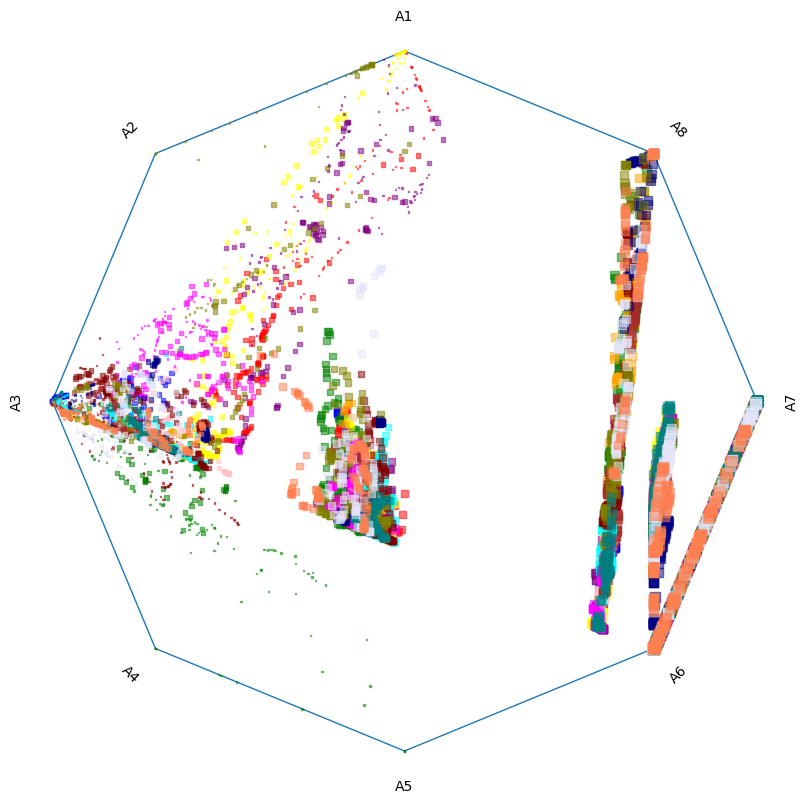

In [114]:
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink', 'Brown', 'Cyan', 'Magenta', 'Maroon', 'Navy', 'Olive', 'Teal', 'Lavender', 'Coral']

df_args = df[['Location']].copy()
df_args['Location'] = [i.replace('Twilight','') for i in df_args['Location']]

df_args['color'] = colors[0]
uniq_locations = df_args['Location'].unique()
for i in range(len(uniq_locations)):
    df_args['color'][df_args['Location']==uniq_locations[i]] = colors[i]

df_args['size'] = [int(i.replace('L','')) for i in df['Level']]

plot_args = {'color': df_args['color'], 's': df_args['size']}

AA8.plot_simplex(AA8.alfa, plot_args)

C:\Users\nandy\AppData\Local\Temp\ipykernel_26016\11617411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_args['color'][df_args['Twilight']==True] = 'blue'


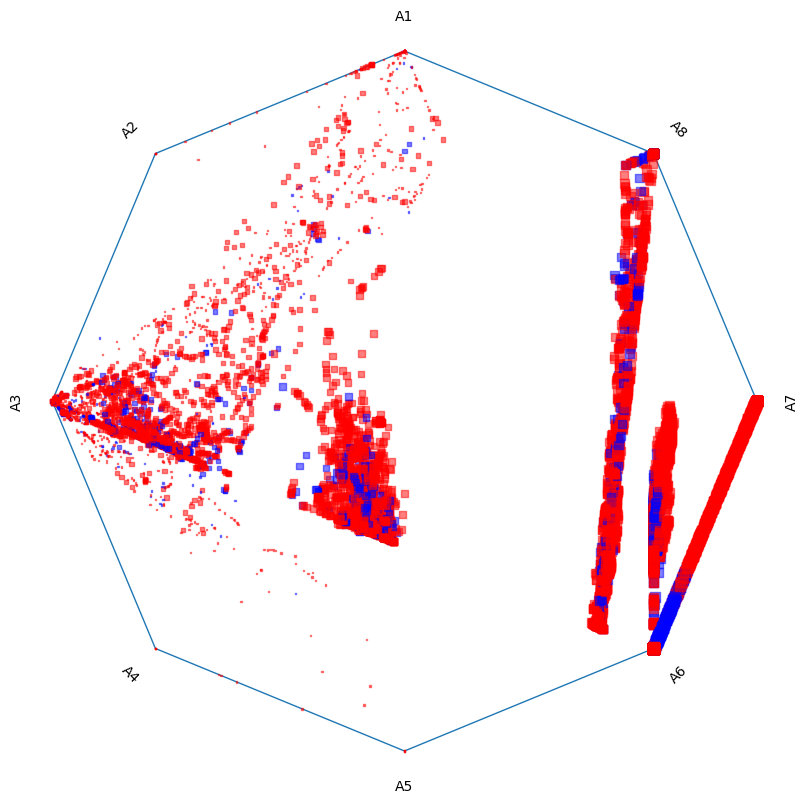

In [118]:
colors = ['Red', 'Blue']

df_args = df[['Location']].copy()
df_args['Twilight'] = [True if 'Twilight' in i else False for i in df_args['Location']]
    
df_args['color'] = 'red'
df_args['color'][df_args['Twilight']==True] = 'blue'

df_args['size'] = [int(i.replace('L','')) for i in df['Level']]

plot_args = {'color': df_args['color'], 's': df_args['size']}

AA8.plot_simplex(AA8.alfa, plot_args)

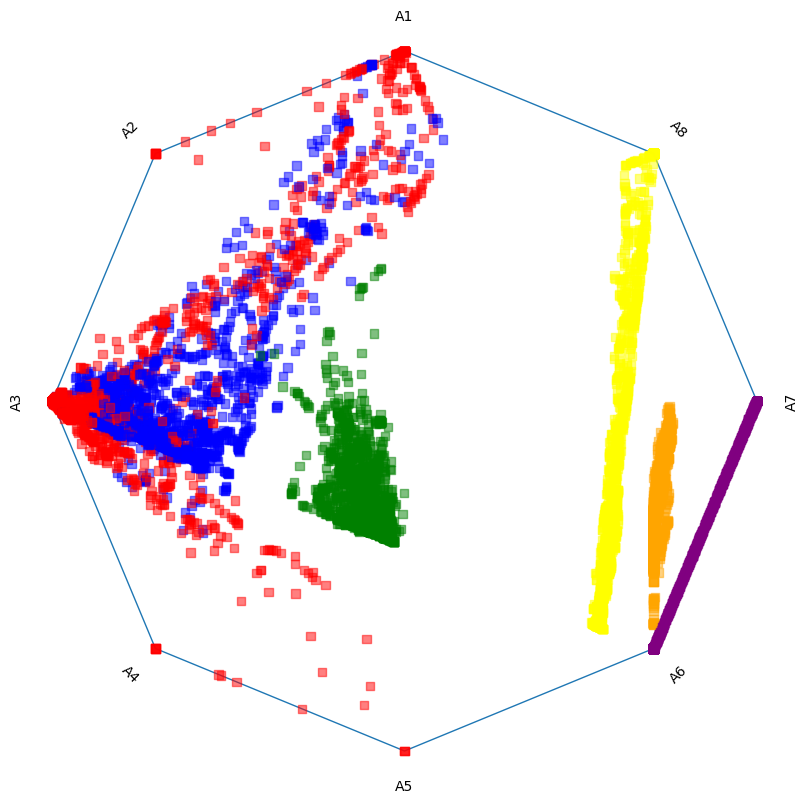

In [125]:
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple']

df_args = df[['Level']].copy()

df_args['color'] = colors[0]
uniq_levels = df_args['Level'].unique()
uniq_levels.sort()
for i in range(len(uniq_levels)):
    df_args['color'][df_args['Level']==uniq_levels[i]] = colors[i]
    print()

plot_args = {'color': df_args['color']}

AA8.plot_simplex(AA8.alfa, plot_args)

In [123]:
uniq_levels

[1, 10, 23, 35, 48, 56]

In [94]:
df['Location'].unique()

array(['AmazonTwilight', 'Amazon', 'AtlanticOceanTwilight',
       'AtlanticOcean', 'BeijingTwilight', 'Beijing', 'BorneoTwilight',
       'Borneo', 'CapeGrimTwilight', 'CapeGrim', 'CongoTwilight', 'Congo',
       'ElDjoufTwilight', 'ElDjouf', 'GraciosaTwilight', 'Graciosa',
       'IndianOceanTwilight', 'IndianOcean', 'KinshasaTwilight',
       'Kinshasa', 'LosAngelesTwilight', 'LosAngeles', 'McMurdoTwilight',
       'McMurdo', 'OzarksTwilight', 'Ozarks', 'PacificOceanTwilight',
       'PacificOcean', 'ParisTwilight', 'Paris', 'UtqiagvikTwilight',
       'Utqiagvik'], dtype=object)

In [98]:
df_args

['Location']

In [111]:
df['Level'].unique()

array(['L10', 'L1', 'L23', 'L35', 'L48', 'L56'], dtype=object)

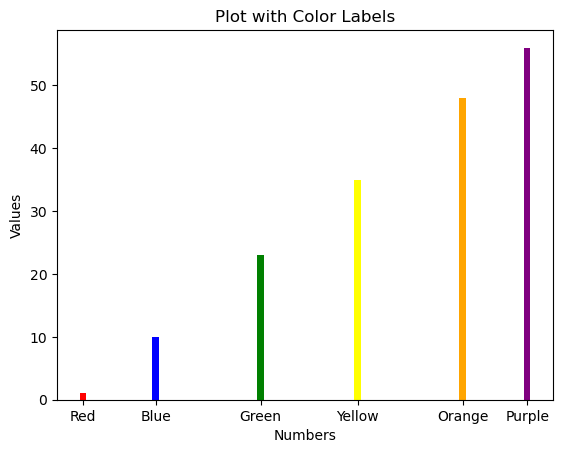

In [126]:
import matplotlib.pyplot as plt

# Data
numbers = [1, 10, 23, 35, 48, 56]
color_names = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple']

# Plotting
plt.bar(numbers, numbers, color=color_names)
plt.xlabel('Numbers')
plt.ylabel('Values')
plt.title('Plot with Color Labels')
plt.xticks(numbers, color_names)  # Assigning color names as tick labels
plt.show()

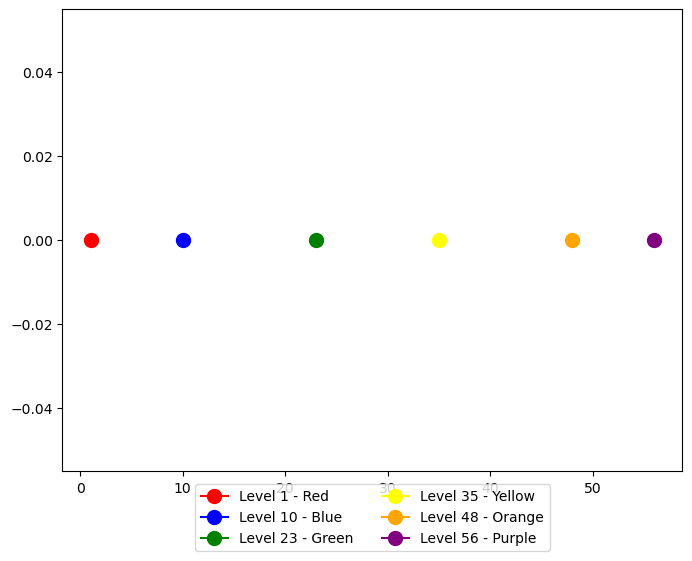

In [129]:
import matplotlib.pyplot as plt

# Data
numbers = [1, 10, 23, 35, 48, 56]
color_names = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple']

# Plotting
plt.figure(figsize=(8, 6))
for num, color in zip(numbers, color_names):
    plt.plot(num, 0, marker='o', color=color, markersize=10, label=f'Level {num} - {color}')

# plt.xlim(0, max(numbers) + 10)
# plt.ylim(-1, 1)
# plt.yticks([])
# plt.xlabel('Numbers')
# plt.title('Colors associated with Numbers')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()
